<a href="https://colab.research.google.com/github/sananaz-git/city_of_whittlesea/blob/main/FactorAnalysis_and_Visualisations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# City of Whittlesea Household survey Factor Analysis


Dataset:  

1.   Here we use the merged dataset  - merged_cleaned
2.   This is the result of data of 'person one' from person dataset and household.





In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
!pip install plotnine
from plotnine import *
import plotnine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
filepath = "/content/merged_cleaned.csv"
merged_df = pd.read_csv(filepath)

In [4]:
pd.options.display.max_rows = 608
pd.options.display.max_columns = 527

### First 5 records of merged person and household dataset

In [5]:
merged_df.head() 

,Q26,Q27,Person no,Precinct,Q13 1,Q13 10,Q13 11,Q13 12,Q13 2,Q13 3,Q13 4,Q13 5,Q13 6,Q13 7,Q13 8,Q13 9,Q16,Q18 1,Q18 10,Q18 11,Q18 12,Q18 13,Q18 14,Q18 2,Q18 4,Q18 5,Q18 6,Q18 7,Q18 8,Q18 9,Q18 Disability,Q19 1,Q19 2,Q19 3,Q19 4,Q19 5,Q19 6,Q19 7,Q19 8,Q2,Q2 Cohorts,Q20 1,Q20 2,Q20 3,Q20 4,Q20 5,Q20 6,Q20 7,Q20 8,Q20 9,Q25 1,Q25 2,Q25 3,Q25 4,Q25 5,Q25 6,Q25 7,Q25 9,Q31,Q33,Q34 1,Q34 2,Q34 3,Q34 4,Q34 5,Q34 6,Q34 7,Q34 8,Q34 9,Q35 1,Q35 10,Q35 11,Q35 12,Q35 13,Q35 14,Q35 15,Q35 16,Q35 2,Q35 3,Q35 4,Q35 5,Q35 6,Q35 7,Q35 8,Q35 9,Q36 1,Q36 10,Q36 11,Q36 12,Q36 13,Q36 14,Q36 15,Q36 16,Q36 17,Q36 18,Q36 19,Q36 2,Q36 20,Q36 21,Q36 22,Q36 3,Q36 4,Q36 5,Q36 6,Q36 7,Q36 8,Q36 9,disposableincome_x,Q9,Survey no,Weight_x,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_9,Q3_nan,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_nan,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_9,Q21_nan,Q22_school,Q22_uni,Q22_nan,Q23_0,Q23_1,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_nan,Q1_1,Q1_2,Q1_3,Q1_4,Q1_6,Q1_nan,Q6_1,Q6_4,Q6_9,Q30_1,Q30_10,Q30_11,Q30_12,Q30_13,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_9,Q30_nan,Q2_life_1,Q2_life_2,Q2_life_3,Q2_life_4,Q2_life_5,Q2_life_6,Q2_life_7,Q2_life_8,Q2_life_nan,q7 LOTE_1,q7 LOTE_2,q7 LOTE_nan,Q8_1,Q8_2,Q8_nan,Q14_1,Q14_2,Q14_3,Q14_nan,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_nan,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_nan,Q32_1,Q32_2,Q32_3,Q32_4,Q32_5,Q32_nan,Q4_Australians,Q4_others,Q5_1,Q5_2,Q5_3,Q5_4,Q24_1,Q24_11,Q24_12,Q24_13,Q24_2,Q24_3,Q24_4,Q24_5,Q24_6,Q24_7,Q24_8,Q24_9,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_nan,Adults 18yrs over,Expanded structure,Household structure,Lote,No of person,Q40 1 Access,Q40 1 Difficulty,Q40 1 Notaccess,Q40 10 Access,Q40 10 Difficulty,Q40 10 Notaccess,Q40 11 Access,Q40 11 Difficulty,Q40 11 Notaccess,Q40 12 Access,Q40 12 Diffculty,Q40 12 Notaccess,Q40 13 Access,Q40 13 Difficulty,Q40 13 Notaccess,Q40 14 Access,Q40 14 Difficulty,Q40 14 Notaccess,Q40 15 Access,Q40 15 Difficulty,Q40 15 Notaccess,Q40 16 Access,Q40 16 Difficulty,Q40 16 Notaccess,Q40 17 Access,Q40 17 Difficulty,Q40 17 Notaccess,Q40 18 Access,Q40 18 Difficulty,Q40 18 Notaccess,Q40 19 Access,Q40 19 Difficulty,...,Q40 3 Notaccess,Q40 4 Access,Q40 4 Difficulty,Q40 4 Notaccess,Q40 5 Access,Q40 5 Diffculty,Q40 5 Notaccess,Q40 6 Access,Q40 6 Difficulty,Q40 6 Notaccess,Q40 7 Access,Q40 7 Difficulty,Q40 7 Notaccess,Q40 8 Access,Q40 8 Diffculty,Q40 8 Notaccess,Q40 9 Access,Q40 9 Difficulty,Q40 9 Notaccess,Q42 1,Q42 2,Q42 3,Q42 4,Q42 5,Q42 6,Q43 Life 1 Imp,Q43 Life 1 Sat,Q43 Life 2 Imp,Q43 Life 2 Sat,Q43 Life 3 Imp,Q43 Life 3 Sat,Q43 Life 4 Imp,Q43 Life 4 Sat,Q43 Loc 1 Imp,Q43 Loc 1 Sat,Q43 Loc 2 Imp,Q43 Loc 2 Sat,Q43 Loc 3 Imp,Q43 Loc 3 Sat,Q43 Loc 4 Imp,Q43 Loc 4 Sat,Q43 Loc 5 Imp,Q43 Loc 5 Sat,Q43 Loc 6 Imp,Q43 Loc 6 Sat,Q43 Loc 7 Imp,Q43 Loc 7 Sat,Q43 Loc 8 Imp,Q43 Loc 8 Sat,Q43 Ser 1 Imp,Q43 Ser 1 Sat,Q43 Ser 2 Imp,Q43 Ser 2 Sat,Q43 Ser 3 Imp,Q43 Ser 3 Sat,Q43 Ser 4 Imp,Q43 Ser 4 Sat,Q43 Ser 5 Imp,Q43 Ser 5 Sat,Q43 Ser 6 Imp,Q43 Ser 6 Sat,Q44 1,Q44 10,Q44 2,Q44 3,Q44 4,Q44 5,Q44 6,Q44 7,Q44 8,Q44 9,Q45 1,Q45 10,Q45 11,Q45 12,Q45 13,Q45 2,Q45 3,Q45 4,Q45 5,Q45 6,Q45 7,Q45 8,Q45 9,Q46 1,Q46 2,Q46 3,Q46 4,Q46 5,Q46 6,Q46 7,Q47 1,Q47 2,Q47 3,Q47 4,Q47 5,Q47 6,Q48 Current,Q48 Preferred,Q50,Q52 1,Q52 2,Q52 3,Q52 4,Q52 5,Q52 6,Q52 7,Q53 1,Q53 2,Q53 3,Q53 4,Q53 5,Q53 6,Q53 7,Q53 8,Q53 9,q54 1 CCG,q54 1 DN,q54 1 DOE,q54 1 GS,q54 1 LHG,q54 10 CCG,q54 10 DN,q54 10 DOE,q54 10 GS,q54 10 LHG,q54 11 CCG,q54 11 DN,q54 11 DOE,q54 11 GS,q54 11 LHG,q54 12 CCG,q54 12 DN,q54 12 DOE,q54 12 GS,q54 12 LHG,q54 13 CCG,q54 13 DN,q54 13 DOE,q54 13 GS,q54 13 LHG,q54 14 CCG,q54 14 DN,q54 14 DOE,q54 14 GS,q54 14 LHG,q54 15 CCG,q54 15 DN,q54 15 DOE,q54 15 GS,q54 15 LHG,q54 16 CCG,q54 16 DN,q54 16 DOE,q54 16 GS,q54 16 LHG,q54 17 CCG,q54 17 DN,q54 17 DOE,q54 17 GS,q54 17 LHG,q54 18 CCG,q54 18 DN,q54 18 DOE,q54 18 GS,q54 18 LHG,q54 19 CCG,q54 19 DN,q54 19 DOE,q54 19 GS,q54 19 LHG,q54 2 CCG,q54 2 DN,q54 2 DOE,q54 2 GS,q54 2 LHG,q54 20 CCG,q54 20 DN,q54 20 DOE,q54 20 GS,q54 20 LHG,q54 21 CCG,q54 21 DN,q54 21 DOE,q54 21 GS,q54 2

In [6]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Columns: 532 entries, Q26 to income_rent
dtypes: float64(7), int64(522), object(3)
memory usage: 2.5+ MB
None


## Only three columns are non-numeric, the occupation and industries columns, Q26 and Q27 and Precinct.

# In merged dataset there are 608 rows and 532 columns.

In [7]:
merged_df.shape

(608, 532)

# First in merged dataset check for
1. Missing values, i.e. NAs
2. Category columns that can be dropped (Q26, Q27)
3. Other unncessary columns 'Person no', 'Precinct', 'Survey no', 'Weight_x', 'Lote', 'No of person', 'Weight_y', 'Surveyno_survey_df'.

In [29]:
merged_df.isna().sum()

Q26                    211
Q27                    215
Person no                0
Precinct                 1
Q13 1                    0
Q13 10                   0
Q13 11                   0
Q13 12                   0
Q13 2                    0
Q13 3                    0
Q13 4                    0
Q13 5                    0
Q13 6                    0
Q13 7                    0
Q13 8                    0
Q13 9                    0
Q16                      0
Q18 1                    0
Q18 10                   0
Q18 11                   0
Q18 12                   0
Q18 13                   0
Q18 14                   0
Q18 2                    0
Q18 4                    0
Q18 5                    0
Q18 6                    0
Q18 7                    0
Q18 8                    0
Q18 9                    0
Q18 Disability           0
Q19 1                    0
Q19 2                    0
Q19 3                    0
Q19 4                    0
Q19 5                    0
Q19 6                    0
Q

#Preparing person Dataset for Factor Analysis ensuring outliers are removed, standard is scaled and the data features have to be numeric

## Numeric columns extracted from merged_df into num_df

In [9]:
num_df = merged_df.select_dtypes(include=['int64','float64']).copy()

Numeric columns extracted

In [10]:
num_df.head()

,Person no,Q13 1,Q13 10,Q13 11,Q13 12,Q13 2,Q13 3,Q13 4,Q13 5,Q13 6,Q13 7,Q13 8,Q13 9,Q16,Q18 1,Q18 10,Q18 11,Q18 12,Q18 13,Q18 14,Q18 2,Q18 4,Q18 5,Q18 6,Q18 7,Q18 8,Q18 9,Q18 Disability,Q19 1,Q19 2,Q19 3,Q19 4,Q19 5,Q19 6,Q19 7,Q19 8,Q2,Q2 Cohorts,Q20 1,Q20 2,Q20 3,Q20 4,Q20 5,Q20 6,Q20 7,Q20 8,Q20 9,Q25 1,Q25 2,Q25 3,Q25 4,Q25 5,Q25 6,Q25 7,Q25 9,Q31,Q33,Q34 1,Q34 2,Q34 3,Q34 4,Q34 5,Q34 6,Q34 7,Q34 8,Q34 9,Q35 1,Q35 10,Q35 11,Q35 12,Q35 13,Q35 14,Q35 15,Q35 16,Q35 2,Q35 3,Q35 4,Q35 5,Q35 6,Q35 7,Q35 8,Q35 9,Q36 1,Q36 10,Q36 11,Q36 12,Q36 13,Q36 14,Q36 15,Q36 16,Q36 17,Q36 18,Q36 19,Q36 2,Q36 20,Q36 21,Q36 22,Q36 3,Q36 4,Q36 5,Q36 6,Q36 7,Q36 8,Q36 9,disposableincome_x,Q9,Survey no,Weight_x,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_9,Q3_nan,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_nan,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_9,Q21_nan,Q22_school,Q22_uni,Q22_nan,Q23_0,Q23_1,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_nan,Q1_1,Q1_2,Q1_3,Q1_4,Q1_6,Q1_nan,Q6_1,Q6_4,Q6_9,Q30_1,Q30_10,Q30_11,Q30_12,Q30_13,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_9,Q30_nan,Q2_life_1,Q2_life_2,Q2_life_3,Q2_life_4,Q2_life_5,Q2_life_6,Q2_life_7,Q2_life_8,Q2_life_nan,q7 LOTE_1,q7 LOTE_2,q7 LOTE_nan,Q8_1,Q8_2,Q8_nan,Q14_1,Q14_2,Q14_3,Q14_nan,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_nan,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_nan,Q32_1,Q32_2,Q32_3,Q32_4,Q32_5,Q32_nan,Q4_Australians,Q4_others,Q5_1,Q5_2,Q5_3,Q5_4,Q24_1,Q24_11,Q24_12,Q24_13,Q24_2,Q24_3,Q24_4,Q24_5,Q24_6,Q24_7,Q24_8,Q24_9,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_nan,Adults 18yrs over,Expanded structure,Household structure,Lote,No of person,Q40 1 Access,Q40 1 Difficulty,Q40 1 Notaccess,Q40 10 Access,Q40 10 Difficulty,Q40 10 Notaccess,Q40 11 Access,Q40 11 Difficulty,Q40 11 Notaccess,Q40 12 Access,Q40 12 Diffculty,Q40 12 Notaccess,Q40 13 Access,Q40 13 Difficulty,Q40 13 Notaccess,Q40 14 Access,Q40 14 Difficulty,Q40 14 Notaccess,Q40 15 Access,Q40 15 Difficulty,Q40 15 Notaccess,Q40 16 Access,Q40 16 Difficulty,Q40 16 Notaccess,Q40 17 Access,Q40 17 Difficulty,Q40 17 Notaccess,Q40 18 Access,Q40 18 Difficulty,Q40 18 Notaccess,Q40 19 Access,Q40 19 Difficulty,Q40 19 Notaccess,Q40 2 Access,Q40 2 Difficulty,...,Q40 3 Notaccess,Q40 4 Access,Q40 4 Difficulty,Q40 4 Notaccess,Q40 5 Access,Q40 5 Diffculty,Q40 5 Notaccess,Q40 6 Access,Q40 6 Difficulty,Q40 6 Notaccess,Q40 7 Access,Q40 7 Difficulty,Q40 7 Notaccess,Q40 8 Access,Q40 8 Diffculty,Q40 8 Notaccess,Q40 9 Access,Q40 9 Difficulty,Q40 9 Notaccess,Q42 1,Q42 2,Q42 3,Q42 4,Q42 5,Q42 6,Q43 Life 1 Imp,Q43 Life 1 Sat,Q43 Life 2 Imp,Q43 Life 2 Sat,Q43 Life 3 Imp,Q43 Life 3 Sat,Q43 Life 4 Imp,Q43 Life 4 Sat,Q43 Loc 1 Imp,Q43 Loc 1 Sat,Q43 Loc 2 Imp,Q43 Loc 2 Sat,Q43 Loc 3 Imp,Q43 Loc 3 Sat,Q43 Loc 4 Imp,Q43 Loc 4 Sat,Q43 Loc 5 Imp,Q43 Loc 5 Sat,Q43 Loc 6 Imp,Q43 Loc 6 Sat,Q43 Loc 7 Imp,Q43 Loc 7 Sat,Q43 Loc 8 Imp,Q43 Loc 8 Sat,Q43 Ser 1 Imp,Q43 Ser 1 Sat,Q43 Ser 2 Imp,Q43 Ser 2 Sat,Q43 Ser 3 Imp,Q43 Ser 3 Sat,Q43 Ser 4 Imp,Q43 Ser 4 Sat,Q43 Ser 5 Imp,Q43 Ser 5 Sat,Q43 Ser 6 Imp,Q43 Ser 6 Sat,Q44 1,Q44 10,Q44 2,Q44 3,Q44 4,Q44 5,Q44 6,Q44 7,Q44 8,Q44 9,Q45 1,Q45 10,Q45 11,Q45 12,Q45 13,Q45 2,Q45 3,Q45 4,Q45 5,Q45 6,Q45 7,Q45 8,Q45 9,Q46 1,Q46 2,Q46 3,Q46 4,Q46 5,Q46 6,Q46 7,Q47 1,Q47 2,Q47 3,Q47 4,Q47 5,Q47 6,Q48 Current,Q48 Preferred,Q50,Q52 1,Q52 2,Q52 3,Q52 4,Q52 5,Q52 6,Q52 7,Q53 1,Q53 2,Q53 3,Q53 4,Q53 5,Q53 6,Q53 7,Q53 8,Q53 9,q54 1 CCG,q54 1 DN,q54 1 DOE,q54 1 GS,q54 1 LHG,q54 10 CCG,q54 10 DN,q54 10 DOE,q54 10 GS,q54 10 LHG,q54 11 CCG,q54 11 DN,q54 11 DOE,q54 11 GS,q54 11 LHG,q54 12 CCG,q54 12 DN,q54 12 DOE,q54 12 GS,q54 12 LHG,q54 13 CCG,q54 13 DN,q54 13 DOE,q54 13 GS,q54 13 LHG,q54 14 CCG,q54 14 DN,q54 14 DOE,q54 14 GS,q54 14 LHG,q54 15 CCG,q54 15 DN,q54 15 DOE,q54 15 GS,q54 15 LHG,q54 16 CCG,q54 16 DN,q54 16 DOE,q54 16 GS,q54 16 LHG,q54 17 CCG,q54 17 DN,q54 17 DOE,q54 17 GS,q54 17 LHG,q54 18 CCG,q54 18 DN,q54 18 DOE,q54 18 GS,q54 18 LHG,q54 19 CCG,q54 19 DN,q54 19 DOE,q54 19 GS,q54 19 LHG,q54 2 CCG,q54 2 DN,q54 2 DOE,q54 2 GS,q54 2 LHG,q54 20 CCG,q54 20 DN,q54 20 DOE,q54 20 GS,q54 20 LHG,q54 21 CCG,q54 21

In [11]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Columns: 529 entries, Person no to income_rent
dtypes: float64(7), int64(522)
memory usage: 2.5 MB


In [12]:
num_df.shape

(608, 529)

Check for NAs in numeric columns. 

In [13]:
num_df.isna().sum()

Person no               0
Q13 1                   0
Q13 10                  0
Q13 11                  0
Q13 12                  0
Q13 2                   0
Q13 3                   0
Q13 4                   0
Q13 5                   0
Q13 6                   0
Q13 7                   0
Q13 8                   0
Q13 9                   0
Q16                     0
Q18 1                   0
Q18 10                  0
Q18 11                  0
Q18 12                  0
Q18 13                  0
Q18 14                  0
Q18 2                   0
Q18 4                   0
Q18 5                   0
Q18 6                   0
Q18 7                   0
Q18 8                   0
Q18 9                   0
Q18 Disability          0
Q19 1                   0
Q19 2                   0
Q19 3                   0
Q19 4                   0
Q19 5                   0
Q19 6                   0
Q19 7                   0
Q19 8                   0
Q2                      0
Q2 Cohorts              0
Q20 1       

Let's remove unwanted columns from numeric dataframe

In [14]:
cols = ['Person no', 'Survey no', 'Weight_x', 'Lote', 'No of person', 'Weight_y', 'Surveyno_survey_df']
num_df = num_df.drop(cols, axis=1)

In [15]:
print(num_df.isna().sum())

Q13 1                  0
Q13 10                 0
Q13 11                 0
Q13 12                 0
Q13 2                  0
Q13 3                  0
Q13 4                  0
Q13 5                  0
Q13 6                  0
Q13 7                  0
Q13 8                  0
Q13 9                  0
Q16                    0
Q18 1                  0
Q18 10                 0
Q18 11                 0
Q18 12                 0
Q18 13                 0
Q18 14                 0
Q18 2                  0
Q18 4                  0
Q18 5                  0
Q18 6                  0
Q18 7                  0
Q18 8                  0
Q18 9                  0
Q18 Disability         0
Q19 1                  0
Q19 2                  0
Q19 3                  0
Q19 4                  0
Q19 5                  0
Q19 6                  0
Q19 7                  0
Q19 8                  0
Q2                     0
Q2 Cohorts             0
Q20 1                  0
Q20 2                  0
Q20 3                  0


Some Handling for Nan and Infinite values in the num Dataset.

*   Replace any inf or -inf with nan
*   Then drop NA
*   Enfore all datatypes to floats

This ensures no untidy data enters the Machine Learning package.



In [16]:
# Replace Inf and -inf with nan and then dropna
num_df.replace([np.inf, -np.inf], np.nan, inplace=True)
num_df.dropna(inplace=True)

In [17]:
num_df = num_df.astype(float)

In [18]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 0 to 607
Columns: 522 entries, Q13 1 to income_rent
dtypes: float64(522)
memory usage: 2.4 MB


Trying another solution for cleaning nans and infs

In [19]:
def clean(serie):
    output = serie[(np.isnan(serie) == False) & (np.isinf(serie) == False)]
    return output

## Call function clean defined above to ensure all data is finite.

In [22]:
num_df = num_df.apply(clean, axis=1)

In [23]:
num_df.head()

,Q13 1,Q13 10,Q13 11,Q13 12,Q13 2,Q13 3,Q13 4,Q13 5,Q13 6,Q13 7,Q13 8,Q13 9,Q16,Q18 1,Q18 10,Q18 11,Q18 12,Q18 13,Q18 14,Q18 2,Q18 4,Q18 5,Q18 6,Q18 7,Q18 8,Q18 9,Q18 Disability,Q19 1,Q19 2,Q19 3,Q19 4,Q19 5,Q19 6,Q19 7,Q19 8,Q2,Q2 Cohorts,Q20 1,Q20 2,Q20 3,Q20 4,Q20 5,Q20 6,Q20 7,Q20 8,Q20 9,Q25 1,Q25 2,Q25 3,Q25 4,Q25 5,Q25 6,Q25 7,Q25 9,Q31,Q33,Q34 1,Q34 2,Q34 3,Q34 4,Q34 5,Q34 6,Q34 7,Q34 8,Q34 9,Q35 1,Q35 10,Q35 11,Q35 12,Q35 13,Q35 14,Q35 15,Q35 16,Q35 2,Q35 3,Q35 4,Q35 5,Q35 6,Q35 7,Q35 8,Q35 9,Q36 1,Q36 10,Q36 11,Q36 12,Q36 13,Q36 14,Q36 15,Q36 16,Q36 17,Q36 18,Q36 19,Q36 2,Q36 20,Q36 21,Q36 22,Q36 3,Q36 4,Q36 5,Q36 6,Q36 7,Q36 8,Q36 9,disposableincome_x,Q9,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_9,Q3_nan,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_nan,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_9,Q21_nan,Q22_school,Q22_uni,Q22_nan,Q23_0,Q23_1,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_nan,Q1_1,Q1_2,Q1_3,Q1_4,Q1_6,Q1_nan,Q6_1,Q6_4,Q6_9,Q30_1,Q30_10,Q30_11,Q30_12,Q30_13,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_9,Q30_nan,Q2_life_1,Q2_life_2,Q2_life_3,Q2_life_4,Q2_life_5,Q2_life_6,Q2_life_7,Q2_life_8,Q2_life_nan,q7 LOTE_1,q7 LOTE_2,q7 LOTE_nan,Q8_1,Q8_2,Q8_nan,Q14_1,Q14_2,Q14_3,Q14_nan,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_nan,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_nan,Q32_1,Q32_2,Q32_3,Q32_4,Q32_5,Q32_nan,Q4_Australians,Q4_others,Q5_1,Q5_2,Q5_3,Q5_4,Q24_1,Q24_11,Q24_12,Q24_13,Q24_2,Q24_3,Q24_4,Q24_5,Q24_6,Q24_7,Q24_8,Q24_9,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_nan,Adults 18yrs over,Expanded structure,Household structure,Q40 1 Access,Q40 1 Difficulty,Q40 1 Notaccess,Q40 10 Access,Q40 10 Difficulty,Q40 10 Notaccess,Q40 11 Access,Q40 11 Difficulty,Q40 11 Notaccess,Q40 12 Access,Q40 12 Diffculty,Q40 12 Notaccess,Q40 13 Access,Q40 13 Difficulty,Q40 13 Notaccess,Q40 14 Access,Q40 14 Difficulty,Q40 14 Notaccess,Q40 15 Access,Q40 15 Difficulty,Q40 15 Notaccess,Q40 16 Access,Q40 16 Difficulty,Q40 16 Notaccess,Q40 17 Access,Q40 17 Difficulty,Q40 17 Notaccess,Q40 18 Access,Q40 18 Difficulty,Q40 18 Notaccess,Q40 19 Access,Q40 19 Difficulty,Q40 19 Notaccess,Q40 2 Access,Q40 2 Difficulty,Q40 2 Notaccess,Q40 3 Access,Q40 3 Difficulty,Q40 3 Notaccess,Q40 4 Access,Q40 4 Difficulty,Q40 4 Notaccess,Q40 5 Access,Q40 5 Diffculty,Q40 5 Notaccess,Q40 6 Access,Q40 6 Difficulty,Q40 6 Notaccess,Q40 7 Access,Q40 7 Difficulty,Q40 7 Notaccess,Q40 8 Access,Q40 8 Diffculty,Q40 8 Notaccess,Q40 9 Access,Q40 9 Difficulty,Q40 9 Notaccess,Q42 1,Q42 2,Q42 3,Q42 4,Q42 5,Q42 6,Q43 Life 1 Imp,Q43 Life 1 Sat,Q43 Life 2 Imp,Q43 Life 2 Sat,Q43 Life 3 Imp,Q43 Life 3 Sat,Q43 Life 4 Imp,Q43 Life 4 Sat,Q43 Loc 1 Imp,Q43 Loc 1 Sat,Q43 Loc 2 Imp,Q43 Loc 2 Sat,Q43 Loc 3 Imp,Q43 Loc 3 Sat,Q43 Loc 4 Imp,Q43 Loc 4 Sat,Q43 Loc 5 Imp,Q43 Loc 5 Sat,Q43 Loc 6 Imp,Q43 Loc 6 Sat,Q43 Loc 7 Imp,Q43 Loc 7 Sat,Q43 Loc 8 Imp,Q43 Loc 8 Sat,Q43 Ser 1 Imp,Q43 Ser 1 Sat,Q43 Ser 2 Imp,Q43 Ser 2 Sat,Q43 Ser 3 Imp,Q43 Ser 3 Sat,Q43 Ser 4 Imp,Q43 Ser 4 Sat,Q43 Ser 5 Imp,Q43 Ser 5 Sat,Q43 Ser 6 Imp,Q43 Ser 6 Sat,Q44 1,Q44 10,Q44 2,Q44 3,Q44 4,Q44 5,Q44 6,Q44 7,Q44 8,Q44 9,Q45 1,Q45 10,Q45 11,Q45 12,Q45 13,Q45 2,Q45 3,Q45 4,Q45 5,Q45 6,Q45 7,Q45 8,Q45 9,Q46 1,Q46 2,Q46 3,Q46 4,Q46 5,Q46 6,Q46 7,Q47 1,Q47 2,Q47 3,Q47 4,Q47 5,Q47 6,Q48 Current,Q48 Preferred,Q50,Q52 1,Q52 2,Q52 3,Q52 4,Q52 5,Q52 6,Q52 7,Q53 1,Q53 2,Q53 3,Q53 4,Q53 5,Q53 6,Q53 7,Q53 8,Q53 9,q54 1 CCG,q54 1 DN,q54 1 DOE,q54 1 GS,q54 1 LHG,q54 10 CCG,q54 10 DN,q54 10 DOE,q54 10 GS,q54 10 LHG,q54 11 CCG,q54 11 DN,q54 11 DOE,q54 11 GS,q54 11 LHG,q54 12 CCG,q54 12 DN,q54 12 DOE,q54 12 GS,q54 12 LHG,q54 13 CCG,q54 13 DN,q54 13 DOE,q54 13 GS,q54 13 LHG,q54 14 CCG,q54 14 DN,q54 14 DOE,q54 14 GS,q54 14 LHG,q54 15 CCG,q54 15 DN,q54 15 DOE,q54 15 GS,q54 15 LHG,q54 16 CCG,q54 16 DN,q54 16 DOE,q54 16 GS,q54 16 LHG,q54 17 CCG,q54 17 DN,q54 17 DOE,q54 17 GS,q54 17 LHG,q54 18 CCG,q54 18 DN,q54 18 DOE,q54 18 GS,q54 18 LHG,q54 19 CCG,q54 19 DN,q54 19 DOE,q54 19 GS,q54 19 LHG,q54 2 CCG,q54 2 DN,q54 2 DOE,q54 2 GS,q54 2 LHG,q54 20 CCG,q54 20 DN,q54 20 DOE,q54 20 GS,q54 20 LHG,q54 21 CCG,q54 21 DN,q

We can check kernel density distributions of columns using logic below.

In [20]:
col = num_df.iloc[:,10:20].columns

<Figure size 432x288 with 0 Axes>

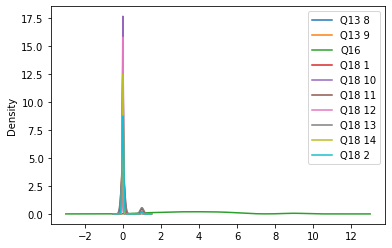

In [21]:
fig = plt.figure()
clean(num_df[col]).plot(kind='kde')
plt.show()

##Certain columns can cause the Factor Analyser to fail due to "array must not contain infs or NaNs" error. Those columns do not contain any value other than 0s. So they need to be removed before Factor Analysis can be performed.

Filtering on the basis of all columns being 0.

In [24]:
columns_with_sum_0 = num_df.loc[:, :].sum().loc[lambda x: x == 0]
columns_with_sum_0

Q18 5                0.0
Q18 7                0.0
Q3_2                 0.0
Q3_3                 0.0
Q3_4                 0.0
Q3_5                 0.0
Q3_9                 0.0
Q3_nan               0.0
Q1_4                 0.0
Q2_life_1            0.0
Q2_life_2            0.0
Q24_7                0.0
Q38_nan              0.0
Q40 15 Notaccess     0.0
Q40 19 Difficulty    0.0
Q40 19 Notaccess     0.0
q54 1 LHG            0.0
q54 10 LHG           0.0
q54 11 CCG           0.0
q54 11 LHG           0.0
q54 13 LHG           0.0
q54 24 LHG           0.0
q54 25 CCG           0.0
q54 25 DOE           0.0
q54 25 LHG           0.0
dtype: float64

In [25]:
cols = ['Q18 5','Q18 7','Q3_2','Q3_3','Q3_4', 'Q3_5', 'Q3_9', 'Q3_nan', 'Q1_4', 'Q1_3', 'Q2_life_1', 'Q2_life_2', 'Q24_7', 'Q40 19 Difficulty', 'Q40 19 Notaccess',
        'q54 1 LHG', 'q54 11 CCG', 'q54 11 LHG', 'q54 13 LHG', 'q54 10 LHG', 'q54 24 LHG', 'q54 25 CCG', 'q54 25 DOE', 'q54 25 LHG', 'Q40 15 Notaccess', 'Q38_nan' ]
num_df = num_df.drop(cols, axis=1)

#Scaling the dataset

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#### Here Standard Scaler is appropriate as it generates z-scores.

In [27]:
scaler =  StandardScaler()
dataframe = scaler.fit_transform(num_df)
dataframe = pd.DataFrame(data=dataframe,columns=num_df.columns)

In [28]:
dataframe.head()

,Q13 1,Q13 10,Q13 11,Q13 12,Q13 2,Q13 3,Q13 4,Q13 5,Q13 6,Q13 7,Q13 8,Q13 9,Q16,Q18 1,Q18 10,Q18 11,Q18 12,Q18 13,Q18 14,Q18 2,Q18 4,Q18 6,Q18 8,Q18 9,Q18 Disability,Q19 1,Q19 2,Q19 3,Q19 4,Q19 5,Q19 6,Q19 7,Q19 8,Q2,Q2 Cohorts,Q20 1,Q20 2,Q20 3,Q20 4,Q20 5,Q20 6,Q20 7,Q20 8,Q20 9,Q25 1,Q25 2,Q25 3,Q25 4,Q25 5,Q25 6,Q25 7,Q25 9,Q31,Q33,Q34 1,Q34 2,Q34 3,Q34 4,Q34 5,Q34 6,Q34 7,Q34 8,Q34 9,Q35 1,Q35 10,Q35 11,Q35 12,Q35 13,Q35 14,Q35 15,Q35 16,Q35 2,Q35 3,Q35 4,Q35 5,Q35 6,Q35 7,Q35 8,Q35 9,Q36 1,Q36 10,Q36 11,Q36 12,Q36 13,Q36 14,Q36 15,Q36 16,Q36 17,Q36 18,Q36 19,Q36 2,Q36 20,Q36 21,Q36 22,Q36 3,Q36 4,Q36 5,Q36 6,Q36 7,Q36 8,Q36 9,disposableincome_x,Q9,Q3_1,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_nan,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_9,Q21_nan,Q22_school,Q22_uni,Q22_nan,Q23_0,Q23_1,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_nan,Q1_1,Q1_2,Q1_6,Q1_nan,Q6_1,Q6_4,Q6_9,Q30_1,Q30_10,Q30_11,Q30_12,Q30_13,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_9,Q30_nan,Q2_life_3,Q2_life_4,Q2_life_5,Q2_life_6,Q2_life_7,Q2_life_8,Q2_life_nan,q7 LOTE_1,q7 LOTE_2,q7 LOTE_nan,Q8_1,Q8_2,Q8_nan,Q14_1,Q14_2,Q14_3,Q14_nan,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_nan,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_nan,Q32_1,Q32_2,Q32_3,Q32_4,Q32_5,Q32_nan,Q4_Australians,Q4_others,Q5_1,Q5_2,Q5_3,Q5_4,Q24_1,Q24_11,Q24_12,Q24_13,Q24_2,Q24_3,Q24_4,Q24_5,Q24_6,Q24_8,Q24_9,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Adults 18yrs over,Expanded structure,Household structure,Q40 1 Access,Q40 1 Difficulty,Q40 1 Notaccess,Q40 10 Access,Q40 10 Difficulty,Q40 10 Notaccess,Q40 11 Access,Q40 11 Difficulty,Q40 11 Notaccess,Q40 12 Access,Q40 12 Diffculty,Q40 12 Notaccess,Q40 13 Access,Q40 13 Difficulty,Q40 13 Notaccess,Q40 14 Access,Q40 14 Difficulty,Q40 14 Notaccess,Q40 15 Access,Q40 15 Difficulty,Q40 16 Access,Q40 16 Difficulty,Q40 16 Notaccess,Q40 17 Access,Q40 17 Difficulty,Q40 17 Notaccess,Q40 18 Access,Q40 18 Difficulty,Q40 18 Notaccess,Q40 19 Access,Q40 2 Access,Q40 2 Difficulty,Q40 2 Notaccess,Q40 3 Access,Q40 3 Difficulty,Q40 3 Notaccess,Q40 4 Access,Q40 4 Difficulty,Q40 4 Notaccess,Q40 5 Access,Q40 5 Diffculty,Q40 5 Notaccess,Q40 6 Access,Q40 6 Difficulty,Q40 6 Notaccess,Q40 7 Access,Q40 7 Difficulty,Q40 7 Notaccess,Q40 8 Access,Q40 8 Diffculty,Q40 8 Notaccess,Q40 9 Access,Q40 9 Difficulty,Q40 9 Notaccess,Q42 1,Q42 2,Q42 3,Q42 4,Q42 5,Q42 6,Q43 Life 1 Imp,Q43 Life 1 Sat,Q43 Life 2 Imp,Q43 Life 2 Sat,Q43 Life 3 Imp,Q43 Life 3 Sat,Q43 Life 4 Imp,Q43 Life 4 Sat,Q43 Loc 1 Imp,Q43 Loc 1 Sat,Q43 Loc 2 Imp,Q43 Loc 2 Sat,Q43 Loc 3 Imp,Q43 Loc 3 Sat,Q43 Loc 4 Imp,Q43 Loc 4 Sat,Q43 Loc 5 Imp,Q43 Loc 5 Sat,Q43 Loc 6 Imp,Q43 Loc 6 Sat,Q43 Loc 7 Imp,Q43 Loc 7 Sat,Q43 Loc 8 Imp,Q43 Loc 8 Sat,Q43 Ser 1 Imp,Q43 Ser 1 Sat,Q43 Ser 2 Imp,Q43 Ser 2 Sat,Q43 Ser 3 Imp,Q43 Ser 3 Sat,Q43 Ser 4 Imp,Q43 Ser 4 Sat,Q43 Ser 5 Imp,Q43 Ser 5 Sat,Q43 Ser 6 Imp,Q43 Ser 6 Sat,Q44 1,Q44 10,Q44 2,Q44 3,Q44 4,Q44 5,Q44 6,Q44 7,Q44 8,Q44 9,Q45 1,Q45 10,Q45 11,Q45 12,Q45 13,Q45 2,Q45 3,Q45 4,Q45 5,Q45 6,Q45 7,Q45 8,Q45 9,Q46 1,Q46 2,Q46 3,Q46 4,Q46 5,Q46 6,Q46 7,Q47 1,Q47 2,Q47 3,Q47 4,Q47 5,Q47 6,Q48 Current,Q48 Preferred,Q50,Q52 1,Q52 2,Q52 3,Q52 4,Q52 5,Q52 6,Q52 7,Q53 1,Q53 2,Q53 3,Q53 4,Q53 5,Q53 6,Q53 7,Q53 8,Q53 9,q54 1 CCG,q54 1 DN,q54 1 DOE,q54 1 GS,q54 10 CCG,q54 10 DN,q54 10 DOE,q54 10 GS,q54 11 DN,q54 11 DOE,q54 11 GS,q54 12 CCG,q54 12 DN,q54 12 DOE,q54 12 GS,q54 12 LHG,q54 13 CCG,q54 13 DN,q54 13 DOE,q54 13 GS,q54 14 CCG,q54 14 DN,q54 14 DOE,q54 14 GS,q54 14 LHG,q54 15 CCG,q54 15 DN,q54 15 DOE,q54 15 GS,q54 15 LHG,q54 16 CCG,q54 16 DN,q54 16 DOE,q54 16 GS,q54 16 LHG,q54 17 CCG,q54 17 DN,q54 17 DOE,q54 17 GS,q54 17 LHG,q54 18 CCG,q54 18 DN,q54 18 DOE,q54 18 GS,q54 18 LHG,q54 19 CCG,q54 19 DN,q54 19 DOE,q54 19 GS,q54 19 LHG,q54 2 CCG,q54 2 DN,q54 2 DOE,q54 2 GS,q54 2 LHG,q54 20 CCG,q54 20 DN,q54 20 DOE,q54 20 GS,q54 20 LHG,q54 21 CCG,q54 21 DN,q54 21 DOE,q54 21 GS,q54 21 LHG,q54 22 CCG,q54 22 DN,q54 22 DOE,q54 22 GS,q54 22 LHG,q54 23 CCG,q54 23 DN,q54 23 DOE,q54 23 GS,q54 23 LHG,q54 24 CCG,q54 24 DN,q54 24 DOE,q54 24 GS,q54 25 DN,q54 2

In [30]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Columns: 496 entries, Q13 1 to income_rent
dtypes: float64(496)
memory usage: 2.3 MB


In [31]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 379 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=224e6fc36dbaa0bbed86b2fa2830b5d9ef18253e0d41b1f156b9edeb9c2fed66
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [32]:
import scipy
import patsy
import pytest
import factor_analyzer
from factor_analyzer.factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

import statsmodels
from statsmodels.multivariate.factor import Factor
from statsmodels.multivariate.factor import FactorResults

import sklearn as sk
from sklearn.decomposition import FactorAnalysis


#Bartlett Sphericity and KMO test

###It checks whether correlation is present in the dataset. Null Hypothesis is that correlation is diagonal matrix of 1s. p-value at 0.05 threshold confirms that our null hypothesis is discarded and there is correlation between variables.

In [33]:
chi2,p = calculate_bartlett_sphericity(dataframe)
print("Bartlett Sphericity Test")
print("Chi squared value : ",chi2)
print("p value : ",p)

Bartlett Sphericity Test
Chi squared value :  inf
p value :  0.0


/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:111: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


###KMO Test measures the proportion of variance that might be a common variance among the variables. Larger proportions represents more correlation is present among the variables. KMO score is always between 0 to 1 and values closer to 1 are considered better.

In [34]:
kmo_all,kmo_model = calculate_kmo(dataframe)
print("KMO Test Statisitc",kmo_model)

KMO Test Statisitc 0.3931552009034988


/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:249: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [35]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi2, p = calculate_bartlett_sphericity(dataframe)
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  inf
p value :  0.0


/usr/local/lib/python3.7/dist-packages/factor_analyzer/factor_analyzer.py:111: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


#Factor Analysis

## This is on scaled data, i.e. 'dataframe'. This may take up to 20 mins to run as it is running for number of factors equal to all columns of the dataframe.

In [36]:
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=dataframe.shape[1])

In [ ]:
fa.fit(dataframe)

KeyboardInterrupt: ignored

Eigenvalues are the amount of variance the factors explain. Usually number of factors whose eigenvalues are greater than 1 are chosen.

In a standard normal distribution with mean 0 and Standard deviation 1, the variance will be 1. Since we have standard scaled the data the variance of a feature is 1. This is the reason for selecting factors whose eigenvalues(variance) are greater than 1 i.e. the factors which explain more variance.

In [ ]:
ev,_ = fa.get_eigenvalues()

In [ ]:
fig = px.scatter(x=range(1,dataframe.shape[1]+1), y=ev)
fig.show()

# Choosing an appropriate number of factors is based on the selection of eigenvalues above 1, or where elbow point appears in the graph. But here, we start with 6 factors.

# A) Performing Factor Analysis on 6 Factors.

In [37]:
fa6 = FactorAnalyzer(n_factors=6,rotation='varimax')
fa6.fit(dataframe)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

Eigenvalues

In [38]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa6.get_eigenvalues()[0],columns=['EigenValues']))

      EigenValues
0    2.200703e+01
1    1.435006e+01
2    9.788401e+00
3    9.214477e+00
4    7.370243e+00
5    6.148658e+00
6    5.992688e+00
7    5.514687e+00
8    5.304218e+00
9    5.074701e+00
10   4.792866e+00
11   4.724715e+00
12   4.639298e+00
13   4.573935e+00
14   4.450515e+00
15   4.284618e+00
16   4.138342e+00
17   4.098981e+00
18   3.992312e+00
19   3.922006e+00
20   3.843821e+00
21   3.788798e+00
22   3.673277e+00
23   3.665829e+00
24   3.567015e+00
25   3.477101e+00
26   3.441850e+00
27   3.383681e+00
28   3.303445e+00
29   3.238497e+00
30   3.153774e+00
31   3.111317e+00
32   3.067191e+00
33   3.042329e+00
34   3.008984e+00
35   2.967054e+00
36   2.930989e+00
37   2.902846e+00
38   2.855219e+00
39   2.839555e+00
40   2.783141e+00
41   2.769447e+00
42   2.676389e+00
43   2.648456e+00
44   2.640328e+00
45   2.597383e+00
46   2.559227e+00
47   2.543569e+00
48   2.519863e+00
49   2.490131e+00
50   2.474988e+00
51   2.460628e+00
52   2.446037e+00
53   2.393704e+00
54   2.350

Loadings indicate how much a factor explains a variable. The loading score will range from -1 to 1.Values close to -1 or 1 indicate that the factor has a higher influence on these variables. Values close to 0 indicates that the factor has a lower influence on the variable.

In [39]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa6.loadings_,index=dataframe.columns))

                            0         1         2         3         4  \
Q13 1                0.107215  0.020675 -0.014372  0.031111 -0.070806   
Q13 10              -0.034479  0.021592 -0.000421  0.018109  0.081019   
Q13 11               0.044606 -0.139304  0.130358  0.154913  0.042595   
Q13 12               0.001346 -0.129695 -0.041450  0.133128  0.078718   
Q13 2                0.155250  0.009958  0.042370  0.000017  0.002356   
Q13 3                0.025020 -0.019356  0.001659  0.022271 -0.106914   
Q13 4                0.091341  0.029565  0.048577  0.005747  0.006597   
Q13 5               -0.155348  0.034402  0.041962 -0.002747  0.064922   
Q13 6                0.004336 -0.054307  0.030105 -0.019446 -0.032909   
Q13 7                0.116990 -0.074504  0.021584  0.027520 -0.011855   
Q13 8                0.131827 -0.146774 -0.017842  0.018767  0.011069   
Q13 9                0.051820 -0.108154  0.131084  0.123061  0.040027   
Q16                 -0.033109 -0.017673 -0.270229 -

# Communalities for each column variable for 6 factors

In [40]:
with np.printoptions(precision=4,suppress=True):
    print(pd.DataFrame(fa6.get_communalities(),index=dataframe.columns,columns=['Communalities']))

                     Communalities
Q13 1                     0.018233
Q13 10                    0.009396
Q13 11                    0.064241
Q13 12                    0.042966
Q13 2                     0.037766
Q13 3                     0.023083
Q13 4                     0.013822
Q13 5                     0.031310
Q13 6                     0.007340
Q13 7                     0.021834
Q13 8                     0.046878
Q13 9                     0.055336
Q16                       0.085612
Q18 1                     0.151444
Q18 10                    0.025055
Q18 11                    0.097361
Q18 12                    0.004000
Q18 13                    0.229797
Q18 14                    0.036982
Q18 2                     0.031796
Q18 4                     0.096230
Q18 6                     0.115669
Q18 8                     0.009189
Q18 9                     0.110414
Q18 Disability            0.338741
Q19 1                     0.389749
Q19 2                     0.089171
Q19 3               

# Uniqueness of variables for 6 factors

In [41]:
with np.printoptions(suppress=True,precision=3):
    print(pd.DataFrame(fa6.get_uniquenesses(),index=dataframe.columns,columns=['Uniqueness']))

                     Uniqueness
Q13 1                  0.981767
Q13 10                 0.990604
Q13 11                 0.935759
Q13 12                 0.957034
Q13 2                  0.962234
Q13 3                  0.976917
Q13 4                  0.986178
Q13 5                  0.968690
Q13 6                  0.992660
Q13 7                  0.978166
Q13 8                  0.953122
Q13 9                  0.944664
Q16                    0.914388
Q18 1                  0.848556
Q18 10                 0.974945
Q18 11                 0.902639
Q18 12                 0.996000
Q18 13                 0.770203
Q18 14                 0.963018
Q18 2                  0.968204
Q18 4                  0.903770
Q18 6                  0.884331
Q18 8                  0.990811
Q18 9                  0.889586
Q18 Disability         0.661259
Q19 1                  0.610251
Q19 2                  0.910829
Q19 3                  0.794939
Q19 4                  0.852735
Q19 5                  0.873430
Q19 6   

# B) Performing Factor Analysis on 9 Factors.

In [42]:
fa9 = FactorAnalyzer(n_factors=9,rotation='varimax')
fa9.fit(dataframe)

FactorAnalyzer(n_factors=9, rotation='varimax', rotation_kwargs={})

# C) Performing Factor Analysis on 10 Factors.

In [43]:
fa10 = FactorAnalyzer(n_factors=10,rotation='varimax')
fa10.fit(dataframe)

FactorAnalyzer(n_factors=10, rotation='varimax', rotation_kwargs={})

## With 6 factors cumulative variance explained is 13% 

In [44]:
with np.printoptions(suppress=True,precision=3):
    print(pd.DataFrame(fa6.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                          0          1         2         3         4         5
Variance          16.449215  15.975458  9.371704  8.430478  7.969198  6.152373
Proportional Var   0.033164   0.032209  0.018895  0.016997  0.016067  0.012404
Cumulative Var     0.033164   0.065372  0.084267  0.101264  0.117331  0.129735


## With 9 factors cumulative variance explained is 16% 

In [45]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa9.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                          0          1         2         3         4  \
Variance          16.089297  14.919374  8.135224  7.894836  7.246618   
Proportional Var   0.032438   0.030079  0.016402  0.015917  0.014610   
Cumulative Var     0.032438   0.062517  0.078919  0.094836  0.109446   

                         5         6         7         8  
Variance          6.815757  6.386118  6.047759  5.508055  
Proportional Var  0.013741  0.012875  0.012193  0.011105  
Cumulative Var    0.123188  0.136063  0.148256  0.159361  


## With 10 factors cumulative variance explained is 17% 

In [46]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa10.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                          0          1         2         3         4  \
Variance          15.750435  14.607041  8.083280  7.644791  7.350079   
Proportional Var   0.031755   0.029450  0.016297  0.015413  0.014819   
Cumulative Var     0.031755   0.061205  0.077502  0.092914  0.107733   

                         5         6         7         8         9  
Variance          6.800623  6.409049  6.404615  5.416040  4.980665  
Proportional Var  0.013711  0.012921  0.012913  0.010919  0.010042  
Cumulative Var    0.121444  0.134366  0.147278  0.158197  0.168239  


## As the overall variance did not significantly improve from 6 to 9 or 10 factors. It was decided to proceed with 6 factors only.

# Creation of Factor Scores for Analysis of 6 factors as discussed that is the number of factors to be considered.

In [47]:
# Create a factor's names
num_factor = 6
facs = ['F' + str(i + 1) for i in range(num_factor)]
print(facs)

['F1', 'F2', 'F3', 'F4', 'F5', 'F6']


In [48]:
# The factor scores
df_factors = pd.DataFrame(data = fa6.fit_transform(dataframe),
                          index = pd.MultiIndex.from_frame(merged_df[['Survey no', 'Precinct']]),
                          columns = facs)
df_factors.head(10)

,,F1,F2,F3,F4,F5,F6
Survey no,Precinct,,,,,,
1,Rural North,-0.631501,1.291221,-1.984539,-0.683011,-0.173300,3.061078
2,Whittlesea Township,-3.250825,-1.356749,-1.207130,0.604361,1.402459,1.165759
3,Rural North,-8.514642,0.999177,-3.056839,0.687368,0.614522,-0.430585
4,Rural North,1.334559,-1.246026,0.321313,-0.093335,1.479313,0.481493
5,Whittlesea Township,-4.153204,-1.179487,-0.869407,-1.097255,0.424659,0.292563
6,Whittlesea Township,1.885686,-0.801478,1.251069,0.420384,1.823377,0.545467
7,Whittlesea Township,7.219562,-2.016468,3.919605,1.881103,1.610145,-0.558983
8,Whittlesea Township,0.728110,-1.295246,2.281834,1.077887,0.106456,-0.316236
9,Mill Park,-0.972946,-0.443510,-0.299523,-0.636268,0.329314,-0.668123


In [49]:
df_factors.shape

(608, 6)

### Scale the indexed dataframe i.e. the factor loadings

In [52]:
# Standardize the factors
scaler = MinMaxScaler()
df_factors_scaled = pd.DataFrame(data = scaler.fit_transform(df_factors),
                                 index = pd.MultiIndex.from_frame(merged_df[['Survey no', 'Precinct']]),
                                 columns = facs)

In [53]:
df_factors_scaled.head(10)

,,F1,F2,F3,F4,F5,F6
Survey no,Precinct,,,,,,
1,Rural North,0.486362,0.591342,0.622680,0.218583,0.362023,0.646406
2,Whittlesea Township,0.416554,0.377255,0.653384,0.301481,0.547608,0.450125
3,Rural North,0.276269,0.567730,0.580330,0.306826,0.454808,0.284807
4,Rural North,0.538759,0.386207,0.713751,0.256554,0.556660,0.379262
5,Whittlesea Township,0.392505,0.391587,0.666723,0.191908,0.432447,0.359696
6,Whittlesea Township,0.553447,0.422149,0.750472,0.289634,0.597182,0.385887
7,Whittlesea Township,0.695600,0.323918,0.855867,0.383695,0.572068,0.271509
8,Whittlesea Township,0.522597,0.382228,0.791182,0.331973,0.394971,0.296649
9,Mill Park,0.477262,0.451090,0.689231,0.221593,0.421218,0.260207


### Creating an Index 

For the 6 factors generated, the 1st factor has a weight of 0.255, the 2nd factor has 0.248, the 3rd factor has 0.145, and so on.

In [54]:
# Ratio of variance
ratioVariance = fa6.get_factor_variance()[1] / fa6.get_factor_variance()[1].sum()
df_ratio_var = pd.DataFrame(data = ratioVariance.reshape((1, num_factor)), index = ['Ratio Variance'], columns = facs)
df_ratio_var

,F1,F2,F3,F4,F5,F6
Ratio Variance,0.255627,0.248265,0.14564,0.131013,0.123844,0.09561


In [55]:
# Perform aggregation
dict_index = {}
for i in range(num_factor):
    key = df_factors_scaled.columns[i]
    value = df_factors_scaled.iloc[:,i].values * df_ratio_var.iloc[:,i].values
    dict_index.update({key:value})

Factor scores are now re-calculated and are result of their multiplcation with their weights. 

In [56]:
# Create a dataframe
df_viz1 = pd.DataFrame(dict_index,
                        index = pd.MultiIndex.from_frame(merged_df[['Survey no', 'Precinct']]))
df_viz1.head(10)

,,F1,F2,F3,F4,F5,F6
Survey no,Precinct,,,,,,
1,Rural North,0.124327,0.146809,0.090687,0.028637,0.044834,0.061803
2,Whittlesea Township,0.106483,0.093659,0.095159,0.039498,0.067818,0.043037
3,Rural North,0.070622,0.140948,0.084519,0.040198,0.056326,0.027230
4,Rural North,0.137722,0.095882,0.103951,0.033612,0.068939,0.036261
5,Whittlesea Township,0.100335,0.097217,0.097102,0.025142,0.053556,0.034391
6,Whittlesea Township,0.141476,0.104805,0.109299,0.037946,0.073958,0.036895
7,Whittlesea Township,0.177814,0.080417,0.124648,0.050269,0.070848,0.025959
8,Whittlesea Township,0.133590,0.094894,0.115228,0.043493,0.048915,0.028363
9,Mill Park,0.122001,0.111990,0.100380,0.029032,0.052166,0.024878


In [57]:
# Assign the index of scores and rankings
df_viz1['Score'] = df_viz1.sum(axis = 1).values
df_viz1['Ranking'] = df_viz1['Score'].rank(ascending = False)
df_viz1 = df_viz1.sort_values(by = 'Ranking').reset_index()
df_viz1.head(10)

,Survey no,Precinct,F1,F2,F3,F4,F5,F6,Score,Ranking
0,110,Whittlesea Township,0.232761,0.157487,0.089058,0.019971,0.067787,0.040064,0.607127,1.0
1,283,Epping North,0.253648,0.053431,0.137975,0.046955,0.064352,0.030628,0.586989,2.0
2,548,Epping North,0.172813,0.131553,0.113041,0.063602,0.071189,0.028216,0.580414,3.0
3,451,Mernda,0.176548,0.119337,0.111924,0.040303,0.076654,0.041149,0.565915,4.0
4,516,Doreen,0.147219,0.118111,0.113132,0.059692,0.081128,0.044954,0.564237,5.0
5,402,Lalor,0.221937,0.088043,0.124338,0.048954,0.063920,0.014220,0.561412,6.0
6,117,Doreen,0.155977,0.127530,0.117634,0.048602,0.076366,0.033680,0.559788,7.0
7,106,Whittlesea Township,0.206162,0.084851,0.125145,0.035205,0.077642,0.030029,0.559035,8.0
8,504,Doreen,0.136022,0.156495,0.097451,0.069394,0.047898,0.050679,0.557939,9.0
9,454,Mernda,0.141234,0.128847,0.108262,0.053017,0.078132,0.046666,0.556157,10.0


### The Distribution of Score data is slightly left skewed but overall not too bad.

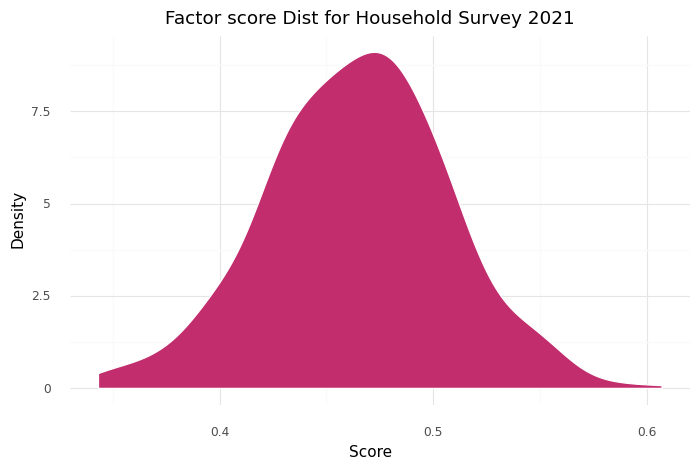

<ggplot: (8737025233357)>

In [58]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
composite_index_distribution = (
    ggplot(data = df_viz1)+
    geom_density(aes(x = 'Score'),
                 color = 'white',
                 fill = '#c22d6d')+
    labs(title = 'Factor score Dist for Household Survey 2021')+
    xlab('Score')+
    ylab('Density')+
    theme_minimal()
)
# Display the viz
composite_index_distribution

### Creating FactorScores dataset that contains Scores and Ranks at record level. Now merging the factor scores, ranks with the original dataset, merged_df.

In [59]:
FactorScores = df_viz1.merge(merged_df,how = "inner",left_on="Survey no",right_on="Survey no")

In [60]:
cols = ['Person no', 'Surveyno_survey_df', 'Weight_x', 'Weight_y', 'Precinct_y']
FactorScores = FactorScores.drop(cols, axis=1)

FactorScores = FactorScores.rename(columns={"Precinct_x":"Precinct"})
FactorScores = FactorScores.round(3)

In [61]:
FactorScores.to_csv("/content/FactorScores.csv", index=False)

In [62]:
factor_df = FactorScores.copy()

In [63]:
factor_df.head()

,Survey no,Precinct,F1,F2,F3,F4,F5,F6,Score,Ranking,Q26,Q27,Q13 1,Q13 10,Q13 11,Q13 12,Q13 2,Q13 3,Q13 4,Q13 5,Q13 6,Q13 7,Q13 8,Q13 9,Q16,Q18 1,Q18 10,Q18 11,Q18 12,Q18 13,Q18 14,Q18 2,Q18 4,Q18 5,Q18 6,Q18 7,Q18 8,Q18 9,Q18 Disability,Q19 1,Q19 2,Q19 3,Q19 4,Q19 5,Q19 6,Q19 7,Q19 8,Q2,Q2 Cohorts,Q20 1,Q20 2,Q20 3,Q20 4,Q20 5,Q20 6,Q20 7,Q20 8,Q20 9,Q25 1,Q25 2,Q25 3,Q25 4,Q25 5,Q25 6,Q25 7,Q25 9,Q31,Q33,Q34 1,Q34 2,Q34 3,Q34 4,Q34 5,Q34 6,Q34 7,Q34 8,Q34 9,Q35 1,Q35 10,Q35 11,Q35 12,Q35 13,Q35 14,Q35 15,Q35 16,Q35 2,Q35 3,Q35 4,Q35 5,Q35 6,Q35 7,Q35 8,Q35 9,Q36 1,Q36 10,Q36 11,Q36 12,Q36 13,Q36 14,Q36 15,Q36 16,Q36 17,Q36 18,Q36 19,Q36 2,Q36 20,Q36 21,Q36 22,Q36 3,Q36 4,Q36 5,Q36 6,Q36 7,Q36 8,Q36 9,disposableincome_x,Q9,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_9,Q3_nan,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_nan,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_9,Q21_nan,Q22_school,Q22_uni,Q22_nan,Q23_0,Q23_1,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_nan,Q1_1,Q1_2,Q1_3,Q1_4,Q1_6,Q1_nan,Q6_1,Q6_4,Q6_9,Q30_1,Q30_10,Q30_11,Q30_12,Q30_13,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_9,Q30_nan,Q2_life_1,Q2_life_2,Q2_life_3,Q2_life_4,Q2_life_5,Q2_life_6,Q2_life_7,Q2_life_8,Q2_life_nan,q7 LOTE_1,q7 LOTE_2,q7 LOTE_nan,Q8_1,Q8_2,Q8_nan,Q14_1,Q14_2,Q14_3,Q14_nan,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_nan,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_nan,Q32_1,Q32_2,Q32_3,Q32_4,Q32_5,Q32_nan,Q4_Australians,Q4_others,Q5_1,Q5_2,Q5_3,Q5_4,Q24_1,Q24_11,Q24_12,Q24_13,Q24_2,Q24_3,Q24_4,Q24_5,Q24_6,Q24_7,Q24_8,Q24_9,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_nan,Adults 18yrs over,Expanded structure,Household structure,Lote,No of person,Q40 1 Access,Q40 1 Difficulty,Q40 1 Notaccess,Q40 10 Access,Q40 10 Difficulty,Q40 10 Notaccess,Q40 11 Access,Q40 11 Difficulty,Q40 11 Notaccess,Q40 12 Access,Q40 12 Diffculty,Q40 12 Notaccess,Q40 13 Access,Q40 13 Difficulty,Q40 13 Notaccess,Q40 14 Access,Q40 14 Difficulty,Q40 14 Notaccess,Q40 15 Access,Q40 15 Difficulty,Q40 15 Notaccess,Q40 16 Access,Q40 16 Difficulty,Q40 16 Notaccess,Q40 17 Access,Q40 17 Difficulty,...,Q40 3 Access,Q40 3 Difficulty,Q40 3 Notaccess,Q40 4 Access,Q40 4 Difficulty,Q40 4 Notaccess,Q40 5 Access,Q40 5 Diffculty,Q40 5 Notaccess,Q40 6 Access,Q40 6 Difficulty,Q40 6 Notaccess,Q40 7 Access,Q40 7 Difficulty,Q40 7 Notaccess,Q40 8 Access,Q40 8 Diffculty,Q40 8 Notaccess,Q40 9 Access,Q40 9 Difficulty,Q40 9 Notaccess,Q42 1,Q42 2,Q42 3,Q42 4,Q42 5,Q42 6,Q43 Life 1 Imp,Q43 Life 1 Sat,Q43 Life 2 Imp,Q43 Life 2 Sat,Q43 Life 3 Imp,Q43 Life 3 Sat,Q43 Life 4 Imp,Q43 Life 4 Sat,Q43 Loc 1 Imp,Q43 Loc 1 Sat,Q43 Loc 2 Imp,Q43 Loc 2 Sat,Q43 Loc 3 Imp,Q43 Loc 3 Sat,Q43 Loc 4 Imp,Q43 Loc 4 Sat,Q43 Loc 5 Imp,Q43 Loc 5 Sat,Q43 Loc 6 Imp,Q43 Loc 6 Sat,Q43 Loc 7 Imp,Q43 Loc 7 Sat,Q43 Loc 8 Imp,Q43 Loc 8 Sat,Q43 Ser 1 Imp,Q43 Ser 1 Sat,Q43 Ser 2 Imp,Q43 Ser 2 Sat,Q43 Ser 3 Imp,Q43 Ser 3 Sat,Q43 Ser 4 Imp,Q43 Ser 4 Sat,Q43 Ser 5 Imp,Q43 Ser 5 Sat,Q43 Ser 6 Imp,Q43 Ser 6 Sat,Q44 1,Q44 10,Q44 2,Q44 3,Q44 4,Q44 5,Q44 6,Q44 7,Q44 8,Q44 9,Q45 1,Q45 10,Q45 11,Q45 12,Q45 13,Q45 2,Q45 3,Q45 4,Q45 5,Q45 6,Q45 7,Q45 8,Q45 9,Q46 1,Q46 2,Q46 3,Q46 4,Q46 5,Q46 6,Q46 7,Q47 1,Q47 2,Q47 3,Q47 4,Q47 5,Q47 6,Q48 Current,Q48 Preferred,Q50,Q52 1,Q52 2,Q52 3,Q52 4,Q52 5,Q52 6,Q52 7,Q53 1,Q53 2,Q53 3,Q53 4,Q53 5,Q53 6,Q53 7,Q53 8,Q53 9,q54 1 CCG,q54 1 DN,q54 1 DOE,q54 1 GS,q54 1 LHG,q54 10 CCG,q54 10 DN,q54 10 DOE,q54 10 GS,q54 10 LHG,q54 11 CCG,q54 11 DN,q54 11 DOE,q54 11 GS,q54 11 LHG,q54 12 CCG,q54 12 DN,q54 12 DOE,q54 12 GS,q54 12 LHG,q54 13 CCG,q54 13 DN,q54 13 DOE,q54 13 GS,q54 13 LHG,q54 14 CCG,q54 14 DN,q54 14 DOE,q54 14 GS,q54 14 LHG,q54 15 CCG,q54 15 DN,q54 15 DOE,q54 15 GS,q54 15 LHG,q54 16 CCG,q54 16 DN,q54 16 DOE,q54 16 GS,q54 16 LHG,q54 17 CCG,q54 17 DN,q54 17 DOE,q54 17 GS,q54 17 LHG,q54 18 CCG,q54 18 DN,q54 18 DOE,q54 18 GS,q54 18 LHG,q54 19 CCG,q54 19 DN,q54 19 DOE,q54 19 GS,q54 19 LHG,q54 2 CCG,q54 2 DN,q54 2 DOE,q54 2 GS,q54 2 LHG,q54 20 CCG,q54 20 DN,q54 20 DOE,q54 20 GS,q54 20 LHG,q54 21 CCG,q54 21 DN,q54 21 DOE,q54 21 GS,q54 21 LHG,q54 22 CCG,q54 22 DN,q54 22 DOE,q54 22 GS,q54 22 

In [64]:
# Above and below the average
stat = ['Above' if i > df_viz1['Score'].mean() else 'Below' for i in df_viz1['Score']]
df_viz1['Status'] = stat
df_viz1.head(10)

,Survey no,Precinct,F1,F2,F3,F4,F5,F6,Score,Ranking,Status
0,110,Whittlesea Township,0.232761,0.157487,0.089058,0.019971,0.067787,0.040064,0.607127,1.0,Above
1,283,Epping North,0.253648,0.053431,0.137975,0.046955,0.064352,0.030628,0.586989,2.0,Above
2,548,Epping North,0.172813,0.131553,0.113041,0.063602,0.071189,0.028216,0.580414,3.0,Above
3,451,Mernda,0.176548,0.119337,0.111924,0.040303,0.076654,0.041149,0.565915,4.0,Above
4,516,Doreen,0.147219,0.118111,0.113132,0.059692,0.081128,0.044954,0.564237,5.0,Above
5,402,Lalor,0.221937,0.088043,0.124338,0.048954,0.063920,0.014220,0.561412,6.0,Above
6,117,Doreen,0.155977,0.127530,0.117634,0.048602,0.076366,0.033680,0.559788,7.0,Above
7,106,Whittlesea Township,0.206162,0.084851,0.125145,0.035205,0.077642,0.030029,0.559035,8.0,Above
8,504,Doreen,0.136022,0.156495,0.097451,0.069394,0.047898,0.050679,0.557939,9.0,Above
9,454,Mernda,0.141234,0.128847,0.108262,0.053017,0.078132,0.046666,0.556157,10.0,Above


In [67]:
# Redefine the data
df_index_reverse = df_viz1.sort_values(by = 'Ranking', ascending = False).reset_index(drop = True)
df_index_reverse.head()

,Survey no,Precinct,F1,F2,F3,F4,F5,F6,Score,Ranking,Status
0,275,Epping,0.046426,0.123095,0.091451,0.032268,0.017448,0.032700,0.343388,608.0,Below
1,277,Lalor,0.015155,0.188610,0.049003,0.008889,0.029465,0.053097,0.344219,607.0,Below
2,595,Bundoora,0.048420,0.139491,0.089513,0.022808,0.023465,0.021526,0.345224,606.0,Below
3,410,Lalor,0.068944,0.125987,0.084815,0.023018,0.023971,0.021909,0.348644,605.0,Below
4,45,Lalor,0.078810,0.118336,0.075947,0.019015,0.024227,0.032680,0.349015,604.0,Below


### Plotting the records which have above or below the mean of Score.

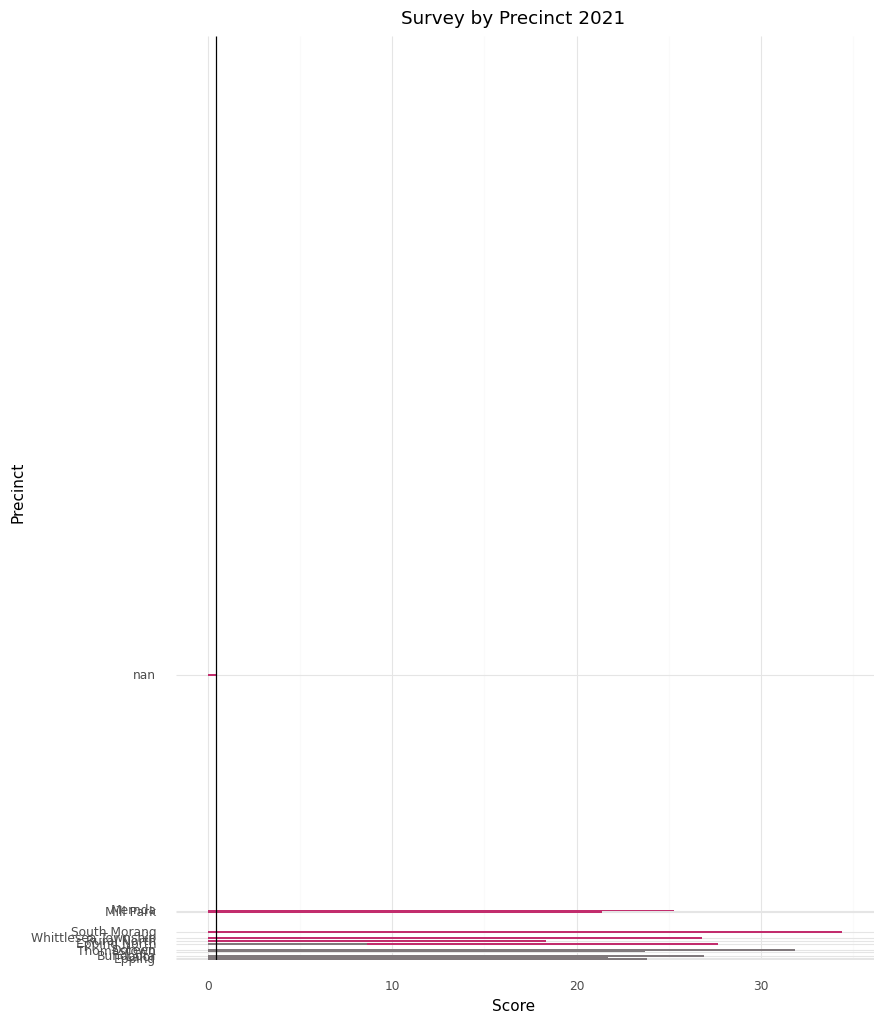

<ggplot: (8737027248181)>

In [66]:
# Data viz
plotnine.options.figure_size = (9, 12)
composite_index_precinct = (
    ggplot(data = df_index_reverse)+
    geom_bar(aes(x = 'Precinct',
                 y = 'Score'),
             width = 1,
             fill = np.where(df_index_reverse['Status'] == 'Above','#c22d6d','#80797c'),
             stat = 'identity')+
    geom_hline(yintercept = df_index_reverse['Score'].mean())+
    scale_x_discrete(limits = df_index_reverse['Precinct'].tolist())+
    labs(title = 'Survey by Precinct 2021')+
    xlab('Precinct')+
    ylab('Score')+
    coord_flip()+
    theme_minimal()
)
# Display the viz
composite_index_precinct

In [69]:
factor_df.head()

,Survey no,Precinct,F1,F2,F3,F4,F5,F6,Score,Ranking,Q26,Q27,Q13 1,Q13 10,Q13 11,Q13 12,Q13 2,Q13 3,Q13 4,Q13 5,Q13 6,Q13 7,Q13 8,Q13 9,Q16,Q18 1,Q18 10,Q18 11,Q18 12,Q18 13,Q18 14,Q18 2,Q18 4,Q18 5,Q18 6,Q18 7,Q18 8,Q18 9,Q18 Disability,Q19 1,Q19 2,Q19 3,Q19 4,Q19 5,Q19 6,Q19 7,Q19 8,Q2,Q2 Cohorts,Q20 1,Q20 2,Q20 3,Q20 4,Q20 5,Q20 6,Q20 7,Q20 8,Q20 9,Q25 1,Q25 2,Q25 3,Q25 4,Q25 5,Q25 6,Q25 7,Q25 9,Q31,Q33,Q34 1,Q34 2,Q34 3,Q34 4,Q34 5,Q34 6,Q34 7,Q34 8,Q34 9,Q35 1,Q35 10,Q35 11,Q35 12,Q35 13,Q35 14,Q35 15,Q35 16,Q35 2,Q35 3,Q35 4,Q35 5,Q35 6,Q35 7,Q35 8,Q35 9,Q36 1,Q36 10,Q36 11,Q36 12,Q36 13,Q36 14,Q36 15,Q36 16,Q36 17,Q36 18,Q36 19,Q36 2,Q36 20,Q36 21,Q36 22,Q36 3,Q36 4,Q36 5,Q36 6,Q36 7,Q36 8,Q36 9,disposableincome_x,Q9,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_9,Q3_nan,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_nan,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_9,Q21_nan,Q22_school,Q22_uni,Q22_nan,Q23_0,Q23_1,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_nan,Q1_1,Q1_2,Q1_3,Q1_4,Q1_6,Q1_nan,Q6_1,Q6_4,Q6_9,Q30_1,Q30_10,Q30_11,Q30_12,Q30_13,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_9,Q30_nan,Q2_life_1,Q2_life_2,Q2_life_3,Q2_life_4,Q2_life_5,Q2_life_6,Q2_life_7,Q2_life_8,Q2_life_nan,q7 LOTE_1,q7 LOTE_2,q7 LOTE_nan,Q8_1,Q8_2,Q8_nan,Q14_1,Q14_2,Q14_3,Q14_nan,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_nan,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_nan,Q32_1,Q32_2,Q32_3,Q32_4,Q32_5,Q32_nan,Q4_Australians,Q4_others,Q5_1,Q5_2,Q5_3,Q5_4,Q24_1,Q24_11,Q24_12,Q24_13,Q24_2,Q24_3,Q24_4,Q24_5,Q24_6,Q24_7,Q24_8,Q24_9,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_nan,Adults 18yrs over,Expanded structure,Household structure,Lote,No of person,Q40 1 Access,Q40 1 Difficulty,Q40 1 Notaccess,Q40 10 Access,Q40 10 Difficulty,Q40 10 Notaccess,Q40 11 Access,Q40 11 Difficulty,Q40 11 Notaccess,Q40 12 Access,Q40 12 Diffculty,Q40 12 Notaccess,Q40 13 Access,Q40 13 Difficulty,Q40 13 Notaccess,Q40 14 Access,Q40 14 Difficulty,Q40 14 Notaccess,Q40 15 Access,Q40 15 Difficulty,Q40 15 Notaccess,Q40 16 Access,Q40 16 Difficulty,Q40 16 Notaccess,Q40 17 Access,Q40 17 Difficulty,...,Q40 3 Access,Q40 3 Difficulty,Q40 3 Notaccess,Q40 4 Access,Q40 4 Difficulty,Q40 4 Notaccess,Q40 5 Access,Q40 5 Diffculty,Q40 5 Notaccess,Q40 6 Access,Q40 6 Difficulty,Q40 6 Notaccess,Q40 7 Access,Q40 7 Difficulty,Q40 7 Notaccess,Q40 8 Access,Q40 8 Diffculty,Q40 8 Notaccess,Q40 9 Access,Q40 9 Difficulty,Q40 9 Notaccess,Q42 1,Q42 2,Q42 3,Q42 4,Q42 5,Q42 6,Q43 Life 1 Imp,Q43 Life 1 Sat,Q43 Life 2 Imp,Q43 Life 2 Sat,Q43 Life 3 Imp,Q43 Life 3 Sat,Q43 Life 4 Imp,Q43 Life 4 Sat,Q43 Loc 1 Imp,Q43 Loc 1 Sat,Q43 Loc 2 Imp,Q43 Loc 2 Sat,Q43 Loc 3 Imp,Q43 Loc 3 Sat,Q43 Loc 4 Imp,Q43 Loc 4 Sat,Q43 Loc 5 Imp,Q43 Loc 5 Sat,Q43 Loc 6 Imp,Q43 Loc 6 Sat,Q43 Loc 7 Imp,Q43 Loc 7 Sat,Q43 Loc 8 Imp,Q43 Loc 8 Sat,Q43 Ser 1 Imp,Q43 Ser 1 Sat,Q43 Ser 2 Imp,Q43 Ser 2 Sat,Q43 Ser 3 Imp,Q43 Ser 3 Sat,Q43 Ser 4 Imp,Q43 Ser 4 Sat,Q43 Ser 5 Imp,Q43 Ser 5 Sat,Q43 Ser 6 Imp,Q43 Ser 6 Sat,Q44 1,Q44 10,Q44 2,Q44 3,Q44 4,Q44 5,Q44 6,Q44 7,Q44 8,Q44 9,Q45 1,Q45 10,Q45 11,Q45 12,Q45 13,Q45 2,Q45 3,Q45 4,Q45 5,Q45 6,Q45 7,Q45 8,Q45 9,Q46 1,Q46 2,Q46 3,Q46 4,Q46 5,Q46 6,Q46 7,Q47 1,Q47 2,Q47 3,Q47 4,Q47 5,Q47 6,Q48 Current,Q48 Preferred,Q50,Q52 1,Q52 2,Q52 3,Q52 4,Q52 5,Q52 6,Q52 7,Q53 1,Q53 2,Q53 3,Q53 4,Q53 5,Q53 6,Q53 7,Q53 8,Q53 9,q54 1 CCG,q54 1 DN,q54 1 DOE,q54 1 GS,q54 1 LHG,q54 10 CCG,q54 10 DN,q54 10 DOE,q54 10 GS,q54 10 LHG,q54 11 CCG,q54 11 DN,q54 11 DOE,q54 11 GS,q54 11 LHG,q54 12 CCG,q54 12 DN,q54 12 DOE,q54 12 GS,q54 12 LHG,q54 13 CCG,q54 13 DN,q54 13 DOE,q54 13 GS,q54 13 LHG,q54 14 CCG,q54 14 DN,q54 14 DOE,q54 14 GS,q54 14 LHG,q54 15 CCG,q54 15 DN,q54 15 DOE,q54 15 GS,q54 15 LHG,q54 16 CCG,q54 16 DN,q54 16 DOE,q54 16 GS,q54 16 LHG,q54 17 CCG,q54 17 DN,q54 17 DOE,q54 17 GS,q54 17 LHG,q54 18 CCG,q54 18 DN,q54 18 DOE,q54 18 GS,q54 18 LHG,q54 19 CCG,q54 19 DN,q54 19 DOE,q54 19 GS,q54 19 LHG,q54 2 CCG,q54 2 DN,q54 2 DOE,q54 2 GS,q54 2 LHG,q54 20 CCG,q54 20 DN,q54 20 DOE,q54 20 GS,q54 20 LHG,q54 21 CCG,q54 21 DN,q54 21 DOE,q54 21 GS,q54 21 LHG,q54 22 CCG,q54 22 DN,q54 22 DOE,q54 22 GS,q54 22 

# 1. Scores by Precinct

In [70]:
fig = px.bar(factor_df, x="Score", y="Precinct", orientation='h', text = "Score",
             hover_data=["F1", "F2", "F3", "F4", "F5", "F6"],height=500, text_auto = ".2f", title='Factor scores by Precinct')
fig.update_traces(texttemplate='%{text:.2s}',textposition ='outside')
fig.update_layout(uniformtext_minsize=8)

fig.show()

# 2. Distribution of Factors by Precinct

In [72]:
# Redefine the data
df_index_reverse = df_viz1.sort_values(by = 'Ranking', ascending = False).reset_index(drop = True)

df_viz3 = pd.melt(frame = df_index_reverse,
                          id_vars = 'Precinct',
                          value_vars = facs,
                          var_name = 'Factor',
                          value_name = 'Factor Value')
df_viz3

,Precinct,Factor,Factor Value
0,Epping,F1,0.046426
1,Lalor,F1,0.015155
2,Bundoora,F1,0.048420
3,Lalor,F1,0.068944
4,Lalor,F1,0.078810
...,...,...,...
3643,Doreen,F6,0.044954
3644,Mernda,F6,0.041149
3645,Epping North,F6,0.028216
3646,Epping North,F6,0.030628


In [73]:
fig = px.scatter(df_viz3, y="Precinct", x="Factor Value", color="Factor", title="Data Distribution grouped by Factors")
fig.update_traces(marker_size=5)

# 3. Score mean and median grouped by Precinct

In [75]:
df_viz1.groupby('Precinct').agg(
    {
        'Score': ['mean', 'median']
    }
).reset_index()

Precinct     Score          
                             mean    median
0              Bundoora  0.471978  0.477512
1                Doreen  0.475290  0.468860
2                Epping  0.458027  0.458008
3          Epping North  0.461276  0.460783
4                 Lalor  0.452694  0.465785
5                Mernda  0.468708  0.471141
6             Mill Park  0.465102  0.468548
7           Rural North  0.459011  0.471307
8          South Morang  0.464764  0.463523
9            Thomastown  0.456216  0.457415
10  Whittlesea Township  0.470057  0.463063

# 4. Boxplots of Scores for each Precinct

/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_boxplot.py:86: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



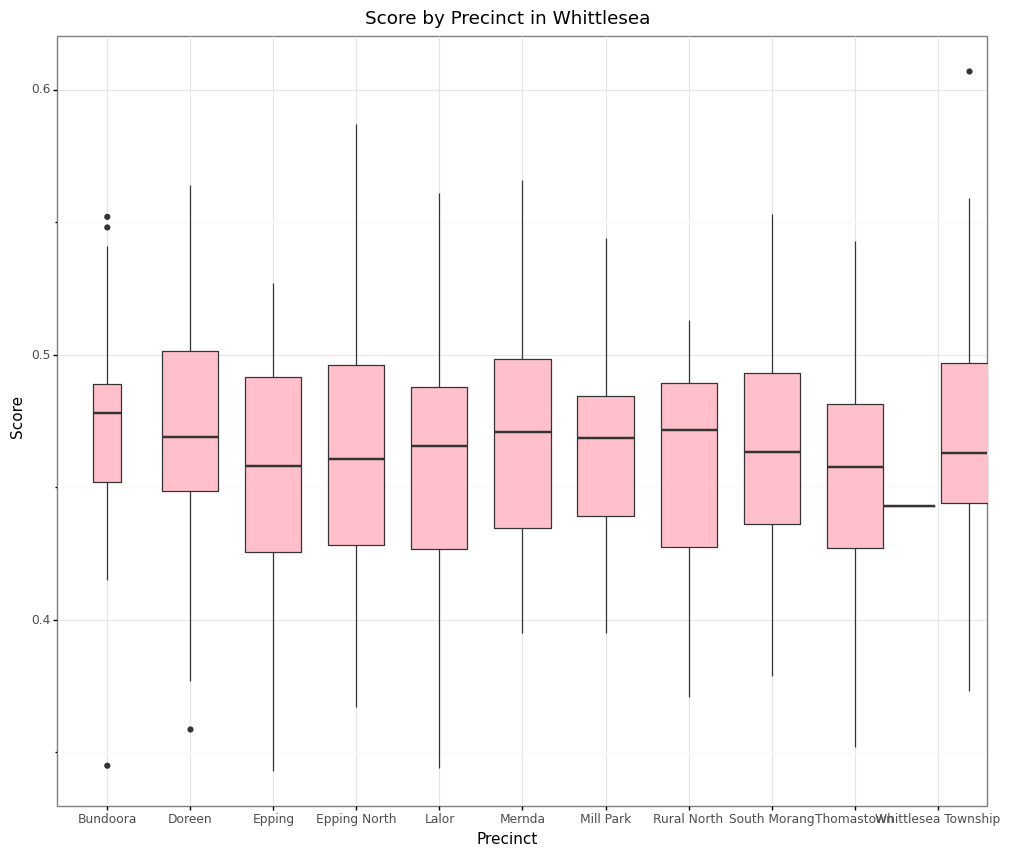

<ggplot: (8737019221097)>

In [77]:
# Data viz
plotnine.options.figure_size = (12, 10)
composite_index_region = (
    ggplot(data = factor_df)+
    geom_boxplot(aes(x = 'Precinct',
                     y = 'Score'),
                     fill = 'pink',
                 show_legend = False)+
    scale_x_discrete(limits = ['Bundoora', 'Doreen', 'Epping', 'Epping North', 'Lalor', 'Mernda', 'Mill Park', 'Rural North', 'South Morang', 
                               'Thomastown', 'Whittlesea Township'])+
    labs(title = 'Score by Precinct in Whittlesea')+
    xlab('Precinct')+
    ylab('Score')+
    theme_bw()
)
# Display the viz
composite_index_region

# 5. Bar chart of Factors and Precinct in overall Dataset

In [78]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
y=factor_df["Precinct"],
x=factor_df["F1"],
name='Factor 1',
orientation='h'
))

fig.add_trace(go.Bar(
y=factor_df["Precinct"],
x=factor_df["F2"],
name='Factor 2',
orientation='h'
))

fig.add_trace(go.Bar(
y=factor_df["Precinct"],
x=factor_df["F3"],
name='Factor 3',
orientation='h'
))

fig.add_trace(go.Bar(
y=factor_df["Precinct"],
x=factor_df["F4"],
name='Factor 4',
orientation='h'
))

fig.add_trace(go.Bar(
y=factor_df["Precinct"],
x=factor_df["F5"],
name='Factor 5',
orientation='h'
))

fig.add_trace(go.Bar(
y=factor_df["Precinct"],
x=factor_df["F6"],
name='Factor 6',
orientation='h'
))

fig.update_layout(barmode='stack', title="Factors by Precinct")
fig.show()




# 6. Weighted percentages of Factors by Precinct

In [79]:
grp_data = factor_df.groupby("Precinct").F1.sum().reset_index()
grp_data.F1

0     7.435
1     8.681
2     6.317
3     8.313
4     6.101
5     7.046
6     5.734
7     5.074
8     9.352
9     6.624
10    7.278
Name: F1, dtype: float64

In [80]:
grp_data = factor_df.groupby("Precinct").F2.sum().reset_index()
grp_data.F2

0     6.858
1     7.996
2     6.853
3     7.087
4     5.734
5     6.318
6     5.651
7     4.676
8     9.294
9     6.256
10    6.569
Name: F2, dtype: float64

In [81]:
grp_data = factor_df.groupby("Precinct").F3.sum().reset_index()
grp_data.F3

0     5.968
1     6.832
2     5.198
3     6.119
4     4.831
5     5.497
6     4.702
7     4.021
8     7.515
9     5.459
10    5.772
Name: F3, dtype: float64

In [82]:
grp_data = factor_df.groupby("Precinct").F4.sum().reset_index()
grp_data.F4

0     2.171
1     2.340
2     1.769
3     2.150
4     1.646
5     1.882
6     1.602
7     1.244
8     2.417
9     1.875
10    1.758
Name: F4, dtype: float64

In [83]:
grp_data = factor_df.groupby("Precinct").F5.sum().reset_index()
grp_data.F5

0     2.653
1     3.866
2     2.123
3     2.264
4     1.927
5     2.826
6     2.232
7     1.930
8     3.493
9     1.976
10    3.514
Name: F5, dtype: float64

In [84]:
grp_data = factor_df.groupby("Precinct").F6.sum().reset_index()
grp_data.F6


0     1.814
1     2.125
2     1.559
3     1.744
4     1.490
5     1.736
6     1.478
7     1.419
8     2.316
9     1.542
10    1.891
Name: F6, dtype: float64

Array of percentages created from lists above

In [85]:
import plotly.graph_objects as go

top_labels = ['F1', 'F2', 'F3', 'F4','F5', 'F6']

colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
          'rgba(122, 120, 168, 0.8)', 'rgba(139, 126, 169, 0.85)',
          'rgba(164, 163, 204, 0.85)',
          'rgba(190, 192, 213, 1)']

x_data = [[7.438357, 6.859975, 5.968432, 2.170026, 2.652901, 1.8130 ],     # Bundoora
          [8.679908, 7.998928, 6.835857, 2.336859, 3.864090, 2.1288 ],     # Doreen
          [6.317664, 6.851280, 5.197026, 1.769718, 2.123080, 1.5586 ],     # Epping
          [8.314232, 7.087257, 6.119790, 2.147337, 2.264943, 1.7430 ],     # Epping North
          [6.102442, 5.733810, 4.835107, 1.644778, 1.924946, 1.4882 ],     # Lalor
          [7.044163, 6.318629, 5.498672, 1.885133, 2.826898, 1.7367 ],     # Mernda      
          [5.732198, 5.652499, 4.700580, 1.603395, 2.229860, 1.4761 ],     # Mill Park
          [5.074822, 4.673735, 4.019404, 1.243009, 1.929012, 1.4204 ],     # Rural North
          [9.352192, 9.295961, 7.515817, 2.416342, 3.493743, 2.3184 ],     # South Morang
          [6.620379, 6.255075, 5.461102, 1.870670, 1.976988, 1.5390 ],     # Thomastown
          [7.279713, 6.570336, 5.774711, 1.758913, 3.514183, 1.8953 ]]     # Whittlesea
x_data = [[round(val, 2) for val in sublst] for sublst in x_data]

y_data = ['Bundoora', 'Doreen', 'Epping','Epping North', 'Lalor', 'Mernda', 'Mill Park', 
          'Rural North','South Morang', 'Thomastown','Whittlesea Township']

fig = go.Figure()

for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

fig.update_layout(
    xaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
        domain=[0.15, 1]
    ),
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        zeroline=False,
    ),
    barmode='stack',
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
    margin=dict(l=120, r=10, t=140, b=80),
    showlegend=False,
)

annotations = []

for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first percentage of each bar (x_axis)
    annotations.append(dict(xref='x', yref='y',
                            x=xd[0] / 2, y=yd,
                            text=str(xd[0]) + '%',
                            font=dict(family='Arial', size=14,
                                      color='rgb(248, 248, 255)'),
                            showarrow=False))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                                showarrow=False))
    space = xd[0]
    for i in range(1, len(xd)):
            # labeling the rest of percentages for each bar (x_axis)
            annotations.append(dict(xref='x', yref='y',
                                    x=space + (xd[i]/2), y=yd,
                                    text=str(xd[i]) + '%',
                                    font=dict(family='Arial', size=14,
                                              color='rgb(248, 248, 255)'),
                                    showarrow=False))
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]

fig.update_layout(annotations=annotations, title = "Factor percentages per Precinct")

fig.show()


### Before proceeding with next plot we need to create a column 'Factor' that contained the Factor name of each row based on highest re-adjusted value of the F1, F2, F3, and so on per row.

In [89]:
factor_df['Factor'] = factor_df[['F1','F2', 'F3', 'F4', 'F5', 'F6']].idxmax(axis=1)
factor_df.head()

,Survey no,Precinct,F1,F2,F3,F4,F5,F6,Score,Ranking,Q26,Q27,Q13 1,Q13 10,Q13 11,Q13 12,Q13 2,Q13 3,Q13 4,Q13 5,Q13 6,Q13 7,Q13 8,Q13 9,Q16,Q18 1,Q18 10,Q18 11,Q18 12,Q18 13,Q18 14,Q18 2,Q18 4,Q18 5,Q18 6,Q18 7,Q18 8,Q18 9,Q18 Disability,Q19 1,Q19 2,Q19 3,Q19 4,Q19 5,Q19 6,Q19 7,Q19 8,Q2,Q2 Cohorts,Q20 1,Q20 2,Q20 3,Q20 4,Q20 5,Q20 6,Q20 7,Q20 8,Q20 9,Q25 1,Q25 2,Q25 3,Q25 4,Q25 5,Q25 6,Q25 7,Q25 9,Q31,Q33,Q34 1,Q34 2,Q34 3,Q34 4,Q34 5,Q34 6,Q34 7,Q34 8,Q34 9,Q35 1,Q35 10,Q35 11,Q35 12,Q35 13,Q35 14,Q35 15,Q35 16,Q35 2,Q35 3,Q35 4,Q35 5,Q35 6,Q35 7,Q35 8,Q35 9,Q36 1,Q36 10,Q36 11,Q36 12,Q36 13,Q36 14,Q36 15,Q36 16,Q36 17,Q36 18,Q36 19,Q36 2,Q36 20,Q36 21,Q36 22,Q36 3,Q36 4,Q36 5,Q36 6,Q36 7,Q36 8,Q36 9,disposableincome_x,Q9,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q3_9,Q3_nan,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_nan,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_9,Q21_nan,Q22_school,Q22_uni,Q22_nan,Q23_0,Q23_1,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_nan,Q1_1,Q1_2,Q1_3,Q1_4,Q1_6,Q1_nan,Q6_1,Q6_4,Q6_9,Q30_1,Q30_10,Q30_11,Q30_12,Q30_13,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_9,Q30_nan,Q2_life_1,Q2_life_2,Q2_life_3,Q2_life_4,Q2_life_5,Q2_life_6,Q2_life_7,Q2_life_8,Q2_life_nan,q7 LOTE_1,q7 LOTE_2,q7 LOTE_nan,Q8_1,Q8_2,Q8_nan,Q14_1,Q14_2,Q14_3,Q14_nan,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_nan,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_nan,Q32_1,Q32_2,Q32_3,Q32_4,Q32_5,Q32_nan,Q4_Australians,Q4_others,Q5_1,Q5_2,Q5_3,Q5_4,Q24_1,Q24_11,Q24_12,Q24_13,Q24_2,Q24_3,Q24_4,Q24_5,Q24_6,Q24_7,Q24_8,Q24_9,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_nan,Adults 18yrs over,Expanded structure,Household structure,Lote,No of person,Q40 1 Access,Q40 1 Difficulty,Q40 1 Notaccess,Q40 10 Access,Q40 10 Difficulty,Q40 10 Notaccess,Q40 11 Access,Q40 11 Difficulty,Q40 11 Notaccess,Q40 12 Access,Q40 12 Diffculty,Q40 12 Notaccess,Q40 13 Access,Q40 13 Difficulty,Q40 13 Notaccess,Q40 14 Access,Q40 14 Difficulty,Q40 14 Notaccess,Q40 15 Access,Q40 15 Difficulty,Q40 15 Notaccess,Q40 16 Access,Q40 16 Difficulty,Q40 16 Notaccess,Q40 17 Access,Q40 17 Difficulty,...,Q40 3 Difficulty,Q40 3 Notaccess,Q40 4 Access,Q40 4 Difficulty,Q40 4 Notaccess,Q40 5 Access,Q40 5 Diffculty,Q40 5 Notaccess,Q40 6 Access,Q40 6 Difficulty,Q40 6 Notaccess,Q40 7 Access,Q40 7 Difficulty,Q40 7 Notaccess,Q40 8 Access,Q40 8 Diffculty,Q40 8 Notaccess,Q40 9 Access,Q40 9 Difficulty,Q40 9 Notaccess,Q42 1,Q42 2,Q42 3,Q42 4,Q42 5,Q42 6,Q43 Life 1 Imp,Q43 Life 1 Sat,Q43 Life 2 Imp,Q43 Life 2 Sat,Q43 Life 3 Imp,Q43 Life 3 Sat,Q43 Life 4 Imp,Q43 Life 4 Sat,Q43 Loc 1 Imp,Q43 Loc 1 Sat,Q43 Loc 2 Imp,Q43 Loc 2 Sat,Q43 Loc 3 Imp,Q43 Loc 3 Sat,Q43 Loc 4 Imp,Q43 Loc 4 Sat,Q43 Loc 5 Imp,Q43 Loc 5 Sat,Q43 Loc 6 Imp,Q43 Loc 6 Sat,Q43 Loc 7 Imp,Q43 Loc 7 Sat,Q43 Loc 8 Imp,Q43 Loc 8 Sat,Q43 Ser 1 Imp,Q43 Ser 1 Sat,Q43 Ser 2 Imp,Q43 Ser 2 Sat,Q43 Ser 3 Imp,Q43 Ser 3 Sat,Q43 Ser 4 Imp,Q43 Ser 4 Sat,Q43 Ser 5 Imp,Q43 Ser 5 Sat,Q43 Ser 6 Imp,Q43 Ser 6 Sat,Q44 1,Q44 10,Q44 2,Q44 3,Q44 4,Q44 5,Q44 6,Q44 7,Q44 8,Q44 9,Q45 1,Q45 10,Q45 11,Q45 12,Q45 13,Q45 2,Q45 3,Q45 4,Q45 5,Q45 6,Q45 7,Q45 8,Q45 9,Q46 1,Q46 2,Q46 3,Q46 4,Q46 5,Q46 6,Q46 7,Q47 1,Q47 2,Q47 3,Q47 4,Q47 5,Q47 6,Q48 Current,Q48 Preferred,Q50,Q52 1,Q52 2,Q52 3,Q52 4,Q52 5,Q52 6,Q52 7,Q53 1,Q53 2,Q53 3,Q53 4,Q53 5,Q53 6,Q53 7,Q53 8,Q53 9,q54 1 CCG,q54 1 DN,q54 1 DOE,q54 1 GS,q54 1 LHG,q54 10 CCG,q54 10 DN,q54 10 DOE,q54 10 GS,q54 10 LHG,q54 11 CCG,q54 11 DN,q54 11 DOE,q54 11 GS,q54 11 LHG,q54 12 CCG,q54 12 DN,q54 12 DOE,q54 12 GS,q54 12 LHG,q54 13 CCG,q54 13 DN,q54 13 DOE,q54 13 GS,q54 13 LHG,q54 14 CCG,q54 14 DN,q54 14 DOE,q54 14 GS,q54 14 LHG,q54 15 CCG,q54 15 DN,q54 15 DOE,q54 15 GS,q54 15 LHG,q54 16 CCG,q54 16 DN,q54 16 DOE,q54 16 GS,q54 16 LHG,q54 17 CCG,q54 17 DN,q54 17 DOE,q54 17 GS,q54 17 LHG,q54 18 CCG,q54 18 DN,q54 18 DOE,q54 18 GS,q54 18 LHG,q54 19 CCG,q54 19 DN,q54 19 DOE,q54 19 GS,q54 19 LHG,q54 2 CCG,q54 2 DN,q54 2 DOE,q54 2 GS,q54 2 LHG,q54 20 CCG,q54 20 DN,q54 20 DOE,q54 20 GS,q54 20 LHG,q54 21 CCG,q54 21 DN,q54 21 DOE,q54 21 GS,q54 21 LHG,q54 22 CCG,q54 22 DN,q54 22 DOE,q54 22 GS,q54 22 LHG,q54 23 CC


# 7. 3D visual of Q2 (Age), Q7 language other than English option 1 (english speaking) and Precinct.

In [96]:
fig = px.scatter_3d(factor_df, x = 'Precinct', y = 'Q2', z = 'q7 LOTE_1', color='Factor', 
                    labels={
                     "Q2":"Age",
                     "q7 LOTE_1":"English"
                 },
                title="Scatter plot", opacity=0.7)
fig

#8. 3D visual of Q2 (Age), Q7 language other than English option 2 (non-english speaking) and Precinct.

In [95]:
fig = px.scatter_3d(factor_df, x = 'Precinct', y = 'Q2', z = 'q7 LOTE_2', color='Factor', 
                    labels={
                     "Q2":"Age",
                     "q7 LOTE_2":"Other than English"
                 },
                title="Scatter plot",opacity=0.7)
fig

#9. Q2(Age), Factors and Precincts.

In [97]:
# Display 

#xline = factor_df['Q2'].mean()
fig = px.bar(factor_df, x='Precinct', y='Q2', text='Q2', color='Factor',barmode='group', labels={'Q2':'Age'})
# Put bar total value above bars with 2 values of precision
#fig.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=1, uniformtext_mode='hide')
#fig.add_hline(y=xline, line_width=2, line_dash="dash", line_color="red")
#fig.update_yaxes(tick0=10, dtick=5)
# Rotate labels 45 degrees
fig.update_layout(
    height=500,
    title_text='Age and Factors', xaxis_tickangle=-45
)
fig.update_layout(xaxis_tickangle=-45)

#10. Q2(Age), Factors and Precincts.

In [104]:

px.scatter(factor_df, x="Precinct", y="Q2", color="Factor", labels={'Q2':'Age'})
  #animation_frame="Q2", animation_group="Precinct_x", range_y=[0,4000000000])

# 11. Violin Plot for Language and Precincts.

In [107]:
fig = go.Figure()
fig.add_trace(go.Violin(x=factor_df['q7 LOTE_1'] == 1 ,
                        y=factor_df['Precinct'],
                        legendgroup='Yes', scalegroup='Yes', name='English',
                        side='negative',
                        line_color='blue'))
fig.add_trace(go.Violin(x= factor_df['q7 LOTE_2'] == 1 ,
                        y=factor_df['Precinct'],
                        legendgroup='Yes', scalegroup='Yes', name='Not English',
                        side='positive',
                        line_color='red'))

#New Visuals

# 12. Lifecycle stages 

In [108]:
df1 = factor_df.loc[:,'Q2_life_1':'Q2_life_nan']
df1.astype(str)
df1['Q2_life'] = " "

In [ ]:
for ind in df1.index:
  if df1['Q2_life_1'][ind] == 1:
    df1['Q2_life'][ind] = 'Young Children'
  elif df1['Q2_life_2'][ind] == 1:
    df1['Q2_life'][ind] = 'Children'
  elif df1['Q2_life_3'][ind] == 1:
    df1['Q2_life'][ind] = 'Adolescents'
  elif df1['Q2_life_4'][ind] == 1:
    df1['Q2_life'][ind] = 'Young Adults'
  elif df1['Q2_life_5'][ind] == 1:
    df1['Q2_life'][ind] = 'Adults'
  elif df1['Q2_life_6'][ind] == 1:
    df1['Q2_life'][ind] = 'Middle-aged Adults'
  elif df1['Q2_life_7'][ind] == 1:
    df1['Q2_life'][ind] = 'Older Adults'
  elif df1['Q2_life_8'][ind] == 1:
    df1['Q2_life'][ind] = 'Senior Citizens'
  else:
    df1['Q2_life'][ind] = 'Others'


In [110]:
factor_df['Q2_life'] = df1['Q2_life']

In [111]:
df1 = df1[['Q2_life']].value_counts()
df1 = df1.to_frame()
df1.reset_index(inplace=True)
df1.rename(columns={0:'Count', 'Q2_life':'Lifestages'}, inplace=True)
df1

,Lifestages,Count
0,Older Adults,184
1,Middle-aged Adults,147
2,Adults,123
3,Senior Citizens,92
4,Young Adults,49
5,Others,11
6,Adolescents,2


In [112]:
fig_bar = px.bar(df1, x='Count', y='Lifestages', template='simple_white',
                      orientation='h', title="Total count by Lifestages")
fig_bar.update_yaxes(tickangle=45)
fig_bar.update_layout(margin=dict(l=20, r=20, t=30, b=20), title={
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig_bar.update_traces(marker_color='pink')

fig_bar 

# 13. Lifestages by District

In [ ]:
factor_df['Precinct'].value_counts()

South Morang           74
Doreen                 67
Epping North           60
Whittlesea Township    57
Bundoora               57
Mernda                 54
Thomastown             52
Epping                 52
Lalor                  48
Mill Park              46
Rural North            40
Name: Precinct, dtype: int64

In [113]:
factor_df['District'] = " "

In [ ]:
for ind in factor_df.index:
  if factor_df['Precinct'][ind] == 'South Morang':
    factor_df['District'][ind] = 'Central East'
  elif factor_df['Precinct'][ind] == 'Doreen':
    factor_df['District'][ind] = 'Central East'
  elif factor_df['Precinct'][ind] == 'Epping North':
    factor_df['District'][ind] = 'Central West'
  elif factor_df['Precinct'][ind] == 'Whittlesea Township':
    factor_df['District'][ind] = 'North'
  elif factor_df['Precinct'][ind] == 'Bundoora':
    factor_df['District'][ind] = 'South East'
  elif factor_df['Precinct'][ind] == 'Mernda':
    factor_df['District'][ind] = 'Central East'
  elif factor_df['Precinct'][ind] == 'Thomastown':
    factor_df['District'][ind] = 'South West'
  elif factor_df['Precinct'][ind] == 'Epping':
    factor_df['District'][ind] = 'South West'
  elif factor_df['Precinct'][ind] == 'Lalor':
    factor_df['District'][ind] = 'South West'
  elif factor_df['Precinct'][ind] == 'Mill Park':
    factor_df['District'][ind] = 'South East'
  else:
    factor_df['District'][ind] = 'North'


In [115]:
factor_df.District.value_counts()

Central East    195
South West      152
South East      103
North            98
Central West     60
Name: District, dtype: int64

In [117]:
df1 = factor_df.groupby(['District','Q2_life']).size().reset_index(name='Age-group counts')
df1.head()

,District,Q2_life,Age-group counts
0,Central East,Adults,58
1,Central East,Middle-aged Adults,48
2,Central East,Older Adults,47
3,Central East,Others,3
4,Central East,Senior Citizens,19


In [118]:
fig = px.bar(y, x='District', y='Age-group counts', color = 'Q2_life', template='simple_white', orientation = 'v',
                  title="Lifestages by District", text='Age-group counts',
      color_discrete_sequence=["indianred", "pink", "lightseagreen", "lightyellow", "palevioletred", "lightblue", "mediumvioletred"])
fig.update_layout(margin=dict(l=20, r=20, t=30, b=20))
fig.update_layout(title={'x':0.5,'xanchor':'center','font':{'size':20}},
                  xaxis={'title':{'text':None}},
                  legend={'font':{'size':10},'title':{'font':{'size':14}, 'text': 'Lifecycle Stages' }})
#fig.update_traces(mode="markers+lines", hovertemplate=None)
#fig.update_layout(hovermode="x unified")
#fig.update_layout(
#    hoverlabel=dict(
##        bgcolor="white",
#        font_size=16,
 #       font_family="Rockwell"
 #   )
#fig.data[0]['marker'].update(color=(135,197,95))

fig

# 14. District and Factors

In [120]:
df1 = factor_df.groupby(['District','Factor']).size().reset_index(name='Record Counts by District and Factor')
df1['Percentage'] = (df1['Record Counts by District and Factor']/df1['Record Counts by District and Factor'].sum()) * 100
df1.head()

,District,Factor,Record Counts by District and Factor,Percentage
0,Central East,F1,103,16.940789
1,Central East,F2,89,14.638158
2,Central East,F3,3,0.493421
3,Central West,F1,38,6.250000
4,Central West,F2,21,3.453947


In [121]:
fig = px.sunburst(df1, path=['District', 'Factor'], values='Percentage', color='District')
fig.show()

# 15. Q40 - Mental Health codes


In [122]:
factor_df['Mental Health'] = ''

In [ ]:
for ind in factor_df.index:
  if factor_df['Q40 7 Access'][ind] == 1:
    factor_df['Mental Health'][ind] = 'Accessed'
  
  elif factor_df['Q40 7 Difficulty'][ind] == 1:
    factor_df['Mental Health'][ind] = 'Difficulty'
  
  elif factor_df['Q40 7 Notaccess'][ind] == 1:
    factor_df['Mental Health'][ind] = 'Not Accessed'
  
  elif factor_df['Q40 8 Access'][ind] == 1:
    factor_df['Mental Health'][ind] = 'Accessed'
  
  elif factor_df['Q40 8 Diffculty'][ind] == 1:
    factor_df['Mental Health'][ind] = 'Difficulty'
  
  elif factor_df['Q40 8 Notaccess'][ind] == 1:
    factor_df['Mental Health'][ind] = 'Not Accessed'
  
  else:
    factor_df['Mental Health'][ind] = 'No Data'

In [124]:
factor_df['Mental Health'].value_counts()

No Data         526
Accessed         51
Not Accessed     19
Difficulty       12
Name: Mental Health, dtype: int64

In [125]:
df1 = factor_df.groupby(['Mental Health','Factor']).size().reset_index(name='Record Counts by Mental Health and Factor')
df1.head()


,Mental Health,Factor,Record Counts by Mental Health and Factor
0,Accessed,F1,32
1,Accessed,F2,19
2,Difficulty,F1,6
3,Difficulty,F2,6
4,No Data,F1,285


In [126]:
df1=df1[df1["Mental Health"] != 'No Data'] 
df1.head()

,Mental Health,Factor,Record Counts by Mental Health and Factor
0,Accessed,F1,32
1,Accessed,F2,19
2,Difficulty,F1,6
3,Difficulty,F2,6
7,Not Accessed,F1,12


In [127]:
fig = px.bar(df1, x="Mental Health", y="Record Counts by Mental Health and Factor", template = "simple_white", orientation="v", barmode='group', 
	           color="Factor", text="Record Counts by Mental Health and Factor")
fig.show()

In [128]:
df2 = factor_df.groupby(['District','Mental Health','Factor']).size().reset_index(name='Record Counts')
df2.head()

,District,Mental Health,Factor,Record Counts
0,Central East,Accessed,F1,9
1,Central East,Accessed,F2,10
2,Central East,Difficulty,F1,2
3,Central East,Difficulty,F2,2
4,Central East,No Data,F1,86


In [130]:
df2=df2[df2["Mental Health"] != 'No Data'] 
df2.head()

,District,Mental Health,Factor,Record Counts
0,Central East,Accessed,F1,9
1,Central East,Accessed,F2,10
2,Central East,Difficulty,F1,2
3,Central East,Difficulty,F2,2
7,Central East,Not Accessed,F1,6


In [131]:
fig = px.bar(df2, x="Mental Health", y="Record Counts", template = "simple_white", orientation="v", barmode='group', 
	           color="Factor", facet_col='District')
fig.show()

# 16. Q40 - Disability

In [132]:
factor_df['Disability'] = ''

In [ ]:
for ind in factor_df.index:
  if factor_df['Q40 6 Access'][ind] == 1:
    factor_df['Disability'][ind] = 'Accessed'
  
  elif factor_df['Q40 6 Difficulty'][ind] == 1:
    factor_df['Disability'][ind] = 'Difficulty'
  
  elif factor_df['Q40 6 Notaccess'][ind] == 1:
    factor_df['Disability'][ind] = 'Not Accessed'
  
  else:
    factor_df['Disability'][ind] = 'No Data'

In [134]:
factor_df['Disability'].value_counts()

No Data         577
Accessed         21
Not Accessed      8
Difficulty        2
Name: Disability, dtype: int64

In [135]:
df1 = factor_df.groupby(['Disability','Factor']).size().reset_index(name='Record Counts by Disability and Factor')
df1.head()


,Disability,Factor,Record Counts by Disability and Factor
0,Accessed,F1,11
1,Accessed,F2,9
2,Accessed,F3,1
3,Difficulty,F2,2
4,No Data,F1,320


In [136]:
df1=df1[df1["Disability"] != 'No Data'] 
df1.head()


,Disability,Factor,Record Counts by Disability and Factor
0,Accessed,F1,11
1,Accessed,F2,9
2,Accessed,F3,1
3,Difficulty,F2,2
7,Not Accessed,F1,4


In [137]:
fig = px.bar(df1, x="Disability", y="Record Counts by Disability and Factor", template = "simple_white", orientation="v", barmode='group', 
             color="Factor", text="Record Counts by Disability and Factor")
fig.show()

In [138]:
df2 = factor_df.groupby(['District','Disability','Factor']).size().reset_index(name='Record Counts')
df2.head()

,District,Disability,Factor,Record Counts
0,Central East,Accessed,F1,1
1,Central East,Accessed,F2,4
2,Central East,Accessed,F3,1
3,Central East,No Data,F1,100
4,Central East,No Data,F2,83


In [139]:
df2=df2[df2["Disability"] != 'No Data'] 
df2.head()

,District,Disability,Factor,Record Counts
0,Central East,Accessed,F1,1
1,Central East,Accessed,F2,4
2,Central East,Accessed,F3,1
6,Central East,Not Accessed,F1,2
7,Central East,Not Accessed,F2,2


In [140]:
fig = px.bar(df2, x="Disability", y="Record Counts", template = "simple_white", orientation="v", barmode='group', 
             color="Factor", facet_col='District')
fig.show()

# 17. Q40 - General Health

In [141]:
factor_df['General Health'] = ''

In [ ]:
for ind in factor_df.index:
  if factor_df['Q40 1 Access'][ind] == 1:
    factor_df['General Health'][ind] = 'Accessed'
  
  elif factor_df['Q40 1 Difficulty'][ind] == 1:
    factor_df['General Health'][ind] = 'Difficulty'
  
  elif factor_df['Q40 1 Notaccess'][ind] == 1:
    factor_df['General Health'][ind] = 'Not Accessed'
  
  elif factor_df['Q40 2 Access'][ind] == 1:
    factor_df['General Health'][ind] = 'Accessed'
  
  elif factor_df['Q40 2 Difficulty'][ind] == 1:
    factor_df['General Health'][ind] = 'Difficulty'
  
  elif factor_df['Q40 2 Notaccess'][ind] == 1:
    factor_df['General Health'][ind] = 'Not Accessed'

  elif factor_df['Q40 3 Access'][ind] == 1:
    factor_df['General Health'][ind] = 'Accessed'
  
  elif factor_df['Q40 3 Difficulty'][ind] == 1:
    factor_df['General Health'][ind] = 'Difficulty'
  
  elif factor_df['Q40 3 Notaccess'][ind] == 1:
    factor_df['General Health'][ind] = 'Not Accessed'

  elif factor_df['Q40 4 Access'][ind] == 1:
    factor_df['General Health'][ind] = 'Accessed'
  
  elif factor_df['Q40 4 Difficulty'][ind] == 1:
    factor_df['General Health'][ind] = 'Difficulty'
  
  elif factor_df['Q40 4 Notaccess'][ind] == 1:
    factor_df['General Health'][ind] = 'Not Accessed'

  elif factor_df['Q40 5 Access'][ind] == 1:
    factor_df['General Health'][ind] = 'Accessed'
  
  elif factor_df['Q40 5 Diffculty'][ind] == 1:
    factor_df['General Health'][ind] = 'Difficulty'
  
  elif factor_df['Q40 5 Notaccess'][ind] == 1:
    factor_df['General Health'][ind] = 'Not Accessed'

  elif factor_df['Q40 9 Access'][ind] == 1:
    factor_df['General Health'][ind] = 'Accessed'
  
  elif factor_df['Q40 9 Difficulty'][ind] == 1:
    factor_df['General Health'][ind] = 'Difficulty'
  
  elif factor_df['Q40 9 Notaccess'][ind] == 1:
    factor_df['General Health'][ind] = 'Not Accessed'

  elif factor_df['Q40 10 Access'][ind] == 1:
    factor_df['General Health'][ind] = 'Accessed'
  
  elif factor_df['Q40 10 Difficulty'][ind] == 1:
    factor_df['General Health'][ind] = 'Difficulty'
  
  elif factor_df['Q40 10 Notaccess'][ind] == 1:
    factor_df['General Health'][ind] = 'Not Accessed'

  elif factor_df['Q40 18 Access'][ind] == 1:
    factor_df['General Health'][ind] = 'Accessed'
  
  elif factor_df['Q40 18 Difficulty'][ind] == 1:
    factor_df['General Health'][ind] = 'Difficulty'
  
  elif factor_df['Q40 18 Notaccess'][ind] == 1:
    factor_df['General Health'][ind] = 'Not Accessed'

  else:
    factor_df['General Health'][ind] = 'No Data'

In [145]:
df1 = factor_df.groupby(['General Health','Factor']).size().reset_index(name='Record Counts by General Health and Factor')
df1.head()

,General Health,Factor,Record Counts by General Health and Factor
0,Accessed,F1,258
1,Accessed,F2,213
2,Accessed,F3,9
3,Difficulty,F1,48
4,Difficulty,F2,28


In [146]:
df1=df1[df1["General Health"] != 'No Data'] 
df1.head()

,General Health,Factor,Record Counts by General Health and Factor
0,Accessed,F1,258
1,Accessed,F2,213
2,Accessed,F3,9
3,Difficulty,F1,48
4,Difficulty,F2,28


In [147]:
fig = px.bar(df1, x="General Health", y="Record Counts by General Health and Factor", template = "simple_white", orientation="v", barmode='group', 
             color="Factor", text="Record Counts by General Health and Factor")
fig.show()

In [148]:
df2 = factor_df.groupby(['District','General Health','Factor']).size().reset_index(name='Record Counts')
df2.head()

,District,General Health,Factor,Record Counts
0,Central East,Accessed,F1,80
1,Central East,Accessed,F2,73
2,Central East,Accessed,F3,2
3,Central East,Difficulty,F1,15
4,Central East,Difficulty,F2,9


In [149]:
df2=df2[df2["General Health"] != 'No Data'] 
df2.head()

,District,General Health,Factor,Record Counts
0,Central East,Accessed,F1,80
1,Central East,Accessed,F2,73
2,Central East,Accessed,F3,2
3,Central East,Difficulty,F1,15
4,Central East,Difficulty,F2,9


In [150]:
fig = px.bar(df2, x="General Health", y="Record Counts", template = "simple_white", orientation="v", barmode='group', 
             color="Factor", facet_col='District')
fig.show()

# 18. Q40 - Education

In [151]:
factor_df['Education'] = ''

In [ ]:
for ind in factor_df.index:
  if factor_df['Q40 12 Access'][ind] == 1:
    factor_df['Education'][ind] = 'Accessed'
  
  elif factor_df['Q40 12 Diffculty'][ind] == 1:
    factor_df['Education'][ind] = 'Difficulty'
  
  elif factor_df['Q40 12 Notaccess'][ind] == 1:
    factor_df['Education'][ind] = 'Not Accessed'

  elif factor_df['Q40 13 Access'][ind] == 1:
    factor_df['Education'][ind] = 'Accessed'
  
  elif factor_df['Q40 13 Difficulty'][ind] == 1:
    factor_df['Education'][ind] = 'Difficulty'
  
  elif factor_df['Q40 13 Notaccess'][ind] == 1:
    factor_df['Education'][ind] = 'Not Accessed'  

  elif factor_df['Q40 14 Access'][ind] == 1:
    factor_df['Education'][ind] = 'Accessed'
  
  elif factor_df['Q40 14 Difficulty'][ind] == 1:
    factor_df['Education'][ind] = 'Difficulty'
  
  elif factor_df['Q40 14 Notaccess'][ind] == 1:
    factor_df['Education'][ind] = 'Not Accessed'

  elif factor_df['Q40 15 Access'][ind] == 1:
    factor_df['Education'][ind] = 'Accessed'
  
  elif factor_df['Q40 15 Difficulty'][ind] == 1:
    factor_df['Education'][ind] = 'Difficulty'
  
  elif factor_df['Q40 15 Notaccess'][ind] == 1:
    factor_df['Education'][ind] = 'Not Accessed'

  elif factor_df['Q40 16 Access'][ind] == 1:
    factor_df['Education'][ind] = 'Accessed'
  
  elif factor_df['Q40 16 Difficulty'][ind] == 1:
    factor_df['Education'][ind] = 'Difficulty'
  
  elif factor_df['Q40 16 Notaccess'][ind] == 1:
    factor_df['Education'][ind] = 'Not Accessed'

  elif factor_df['Q40 17 Access'][ind] == 1:
    factor_df['Education'][ind] = 'Accessed'
  
  elif factor_df['Q40 17 Difficulty'][ind] == 1:
    factor_df['Education'][ind] = 'Difficulty'
  
  elif factor_df['Q40 17 Notaccess'][ind] == 1:
    factor_df['Education'][ind] = 'Not Accessed'

  else:
    factor_df['Education'][ind] = 'No Data'

In [153]:
df1 = factor_df.groupby(['Education','Factor']).size().reset_index(name='Record Counts by Education and Factor')
df1.head()

,Education,Factor,Record Counts by Education and Factor
0,Accessed,F1,122
1,Accessed,F2,82
2,Accessed,F3,2
3,Difficulty,F1,8
4,Difficulty,F2,12


In [154]:
df1=df1[df1["Education"] != 'No Data'] 
df1.head()

,Education,Factor,Record Counts by Education and Factor
0,Accessed,F1,122
1,Accessed,F2,82
2,Accessed,F3,2
3,Difficulty,F1,8
4,Difficulty,F2,12


In [155]:
fig = px.bar(df1, x="Education", y="Record Counts by Education and Factor", template = "simple_white", orientation="v", barmode='group', 
             color="Factor", text="Record Counts by Education and Factor")
fig.show()

In [156]:
df2 = factor_df.groupby(['District','Education','Factor']).size().reset_index(name='Record Counts')
df2.head()

,District,Education,Factor,Record Counts
0,Central East,Accessed,F1,40
1,Central East,Accessed,F2,34
2,Central East,Difficulty,F2,5
3,Central East,No Data,F1,54
4,Central East,No Data,F2,45


In [157]:
df2=df2[df2["Education"] != 'No Data'] 
df2.head()

,District,Education,Factor,Record Counts
0,Central East,Accessed,F1,40
1,Central East,Accessed,F2,34
2,Central East,Difficulty,F2,5
6,Central East,Not Accessed,F1,9
7,Central East,Not Accessed,F2,5


In [158]:
fig = px.bar(df2, x="Education", y="Record Counts", template = "simple_white", orientation="v", barmode='group', 
             color="Factor", facet_col='District')
fig.show()


# 19. Q40 - Financial

In [159]:
factor_df['Financial'] = ''

In [ ]:
for ind in factor_df.index:
  if factor_df['Q40 11 Access'][ind] == 1:
    factor_df['Financial'][ind] = 'Accessed'
  
  elif factor_df['Q40 11 Difficulty'][ind] == 1:
    factor_df['Financial'][ind] = 'Difficulty'
  
  elif factor_df['Q40 11 Notaccess'][ind] == 1:
    factor_df['Financial'][ind] = 'Not Accessed'

  else:
    factor_df['Financial'][ind] = 'No Data'

In [162]:
df1 = factor_df.groupby(['Financial','Factor']).size().reset_index(name='Record Counts by Financial and Factor')
df1=df1[df1["Financial"] != 'No Data'] 
df1.head()

,Financial,Factor,Record Counts by Financial and Factor
0,Accessed,F1,11
1,Accessed,F2,10
2,Accessed,F3,1
3,Difficulty,F1,6
4,Difficulty,F2,4


In [163]:
fig = px.bar(df1, x="Financial", y="Record Counts by Financial and Factor", template = "simple_white", orientation="v", barmode='group', 
             color="Factor", text="Record Counts by Financial and Factor")
fig.show()

In [164]:
df2 = factor_df.groupby(['District','Financial','Factor']).size().reset_index(name='Record Counts')
df2=df2[df2["Financial"] != 'No Data'] 
df2.head()

,District,Financial,Factor,Record Counts
0,Central East,Accessed,F1,2
1,Central East,Accessed,F2,5
2,Central East,Difficulty,F1,2
3,Central East,Difficulty,F2,2
7,Central East,Not Accessed,F1,4


In [165]:
fig = px.bar(df2, x="Financial", y="Record Counts", template = "simple_white", orientation="v", barmode='group', 
             color="Factor", facet_col='District')
fig.show()